In [699]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [726]:

df = pd.read_csv('refinedtrain.csv')
test = pd.read_csv("Newtest.csv")


In [730]:
df[['departure_actualDate', 'departure_actualTime', 'departure_scheduledDate', 'departure_scheduledTime']]

,departure_actualDate,departure_actualTime,departure_scheduledDate,departure_scheduledTime
0,2023-07-20,20:15:00,2023-07-20,20:50:00
1,NaN,NaN,2023-07-18,15:05:00
2,NaN,NaN,2023-07-23,09:50:00
3,2023-07-26,23:51:00,2023-07-26,23:30:00
4,NaN,NaN,2023-07-20,11:35:00
...,...,...,...,...
51567,2024-07-06,19:25:00,2024-07-06,19:00:00
51568,NaN,NaN,2024-07-06,19:45:00
51569,NaN,NaN,2024-07-04,17:00:00
51570,NaN,NaN,2024-07-03,10:00:00


In [733]:
df['actual_datetime'] = pd.to_datetime(
    df['departure_actualDate'] + ' ' + df['departure_actualTime'],
    format='%Y-%m-%d %H:%M:%S', errors='coerce'
)
df['scheduled_datetime'] = pd.to_datetime(
    df['departure_scheduledDate'] + ' ' + df['departure_scheduledTime'],
    format='%Y-%m-%d %H:%M:%S', errors='coerce'
)

print(df[['scheduled_datetime', 'actual_datetime']].head())


   scheduled_datetime     actual_datetime
0 2023-07-20 20:50:00 2023-07-20 20:15:00
1 2023-07-18 15:05:00                 NaT
2 2023-07-23 09:50:00                 NaT
3 2023-07-26 23:30:00 2023-07-26 23:51:00
4 2023-07-20 11:35:00                 NaT


In [734]:


# Recalculate delay_minutes
df['delay_minutes'] = np.where(
    (df['is_delay'] == 1) & df['scheduled_datetime'].notna() & df['actual_datetime'].notna(),
    (df['actual_datetime'] - df['scheduled_datetime']).dt.total_seconds() / 60,
    np.where(df['is_delay'] == 0, 0, np.nan)
)

df['delay_minutes'] = np.where(
    (df['is_delay'] == 1) & df['scheduled_datetime'].notna() & df['actual_datetime'].notna(),
    (df['actual_datetime'] - df['scheduled_datetime']).dt.total_seconds() / 60,
    np.where(df['is_delay'] == 0, 0, np.nan)
)


df.drop(['scheduled_datetime', 'actual_datetime'], axis=1, inplace=True)

print(df[['is_delay', 'delay_minutes', 'departure_actualTime', 'departure_scheduledTime']])



       is_delay  delay_minutes departure_actualTime departure_scheduledTime
0           0.0            0.0             20:15:00                20:50:00
1           NaN            NaN                  NaN                15:05:00
2           NaN            NaN                  NaN                09:50:00
3           1.0           21.0             23:51:00                23:30:00
4           NaN            NaN                  NaN                11:35:00
...         ...            ...                  ...                     ...
51567       1.0           25.0             19:25:00                19:00:00
51568       NaN            NaN                  NaN                19:45:00
51569       NaN            NaN                  NaN                17:00:00
51570       NaN            NaN                  NaN                10:00:00
51571       NaN            NaN                  NaN                06:10:00

[51572 rows x 4 columns]


In [735]:
df.isna().sum()

type                                 0
status                               0
departure_iataCode                   0
departure_terminal               21750
departure_scheduledTime              0
departure_estimatedTime           7007
departure_actualTime             20582
arrival_iataCode                     0
arrival_terminal                 31007
arrival_scheduledTime                0
arrival_estimatedTime            21364
airline_name                         0
airline_icaoCode                     0
flight_number                        0
flight_icaoNumber                    0
arrival_baggage                  33454
codeshared_airline_name          35689
codeshared_airline_icaoCode      35689
codeshared_flight_number         35689
codeshared_flight_icaoNumber     35689
arrival_actualTime               51320
departure_scheduledDate              0
departure_actualDate             20582
departure_estimatedRunwayDate    20582
departure_estimatedRunwayTime    20582
departure_actualRunwayDat

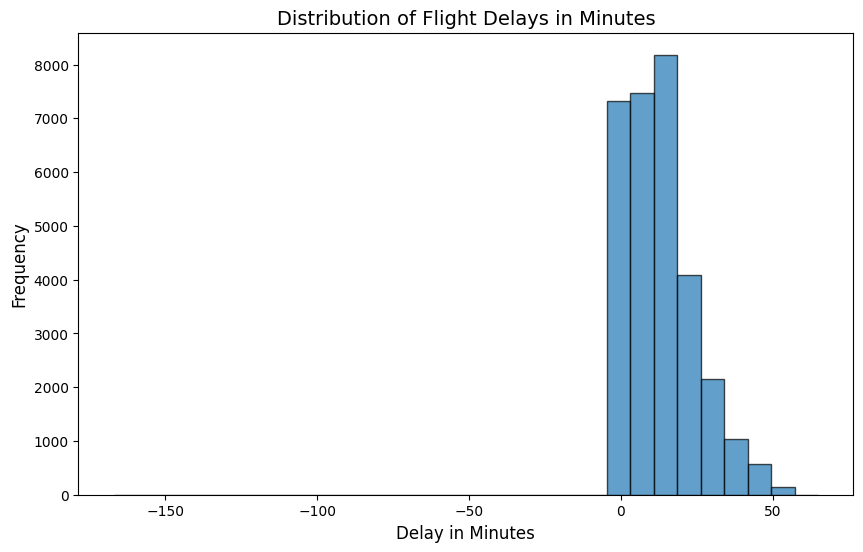

In [736]:

plt.figure(figsize=(10, 6))
df['delay_minutes'].dropna().plot(kind='hist', bins=30, edgecolor='black', alpha=0.7)

# Adding labels and title
plt.title('Distribution of Flight Delays in Minutes', fontsize=14)
plt.xlabel('Delay in Minutes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


In [737]:

def categorize_delay(row):
    if pd.isna(row['delay_minutes']):
        return np.nan # Return NaN if delay_minutes is NaN
    elif row['delay_minutes'] == 0:
        return 'No Delay'
    elif row['delay_minutes'] < 45:
        return 'Short Delay'
    elif row['delay_minutes'] <= 175:
        return 'Moderate Delay'
    elif row['delay_minutes'] > 175:
        return 'Long Delay'
    
df['delay_category'] = df.apply(categorize_delay, axis=1)

df[['delay_minutes', 'delay_category']]


,delay_minutes,delay_category
0,0.0,No Delay
1,NaN,NaN
2,NaN,NaN
3,21.0,Short Delay
4,NaN,NaN
...,...,...
51567,25.0,Short Delay
51568,NaN,NaN
51569,NaN,NaN
51570,NaN,NaN


In [738]:

print( len(df) )

nulls = df.isnull().sum()
nulls_percentage = (df.isnull().mean()) * 100

missing_summary = pd.DataFrame({'Missing Values': nulls, 'Percentage Missing': nulls_percentage})

missing_summary[missing_summary['Missing Values'] > 0].sort_values(by='Percentage Missing', ascending=False)


51572


,Missing Values,Percentage Missing
arrival_estimatedRunwayDate,51320,99.511363
arrival_estimatedRunwayTime,51320,99.511363
arrival_actualRunwayDate,51320,99.511363
arrival_actualRunwayTime,51320,99.511363
arrival_actualTime,51320,99.511363
codeshared_airline_name,35689,69.202280
codeshared_flight_number,35689,69.202280
codeshared_airline_icaoCode,35689,69.202280
codeshared_flight_icaoNumber,35689,69.202280
arrival_baggage,33454,64.868533


In [739]:

df.head(3)


,type,status,departure_iataCode,departure_terminal,departure_scheduledTime,departure_estimatedTime,departure_actualTime,arrival_iataCode,arrival_terminal,arrival_scheduledTime,arrival_estimatedTime,airline_name,airline_icaoCode,flight_number,flight_icaoNumber,arrival_baggage,codeshared_airline_name,codeshared_airline_icaoCode,codeshared_flight_number,codeshared_flight_icaoNumber,arrival_actualTime,departure_scheduledDate,departure_actualDate,departure_estimatedRunwayDate,departure_estimatedRunwayTime,departure_actualRunwayDate,departure_actualRunwayTime,arrival_scheduledDate,arrival_estimatedDate,arrival_estimatedRunwayDate,arrival_estimatedRunwayTime,arrival_actualRunwayDate,arrival_actualRunwayTime,Time,Temperature (°F)_Avg,Dew Point (°F)_Avg,Dew Point (°F)_Min,Humidity (%)_Avg,Humidity (%)_Min,Wind Speed (mph)_Avg,Pressure (in)_Avg,Pressure (in)_Min,Pressure (in)_Max,is_delay,delay_minutes,delay_category
0,departure,active,lhe,m,20:50:00,2023-07-20t20:00:00.000,20:15:00,ruh,4,23:20:00,21:54:00,saudia,sva,737,sva737,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-20,2023-07-20,2023-07-20,20:15:00,2023-07-20,20:15:00,2023-07-20,2023-07-20,NaN,NaN,NaN,NaN,2023-07-20,88.2,79.8,77,76.0,63,5.3,28.8,28.7,28.9,0.0,0.0,No Delay
1,departure,active,lhe,NaN,15:05:00,2023-07-18t15:05:00.000,NaN,khi,NaN,16:50:00,NaN,flyjinnah,fjl,843,fjl843,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-18,NaN,NaN,NaN,NaN,NaN,2023-07-18,NaN,NaN,NaN,NaN,NaN,2023-07-18,89.4,80.1,77,73.8,63,10.2,28.8,28.7,28.8,NaN,NaN,NaN
2,departure,active,lhe,NaN,09:50:00,NaN,NaN,khi,NaN,11:35:00,NaN,flyjinnah,fjl,841,fjl841,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-23,NaN,NaN,NaN,NaN,NaN,2023-07-23,NaN,NaN,NaN,NaN,NaN,2023-07-23,86.6,75.8,73,71.2,56,8.1,28.9,28.8,29.0,NaN,NaN,NaN


C:\Users\Muhammad Umer\AppData\Local\Temp\ipykernel_13396\767814035.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['is_delay'] = df_cleaned['is_delay'].astype(int)  # Ensure is_delay is numeric


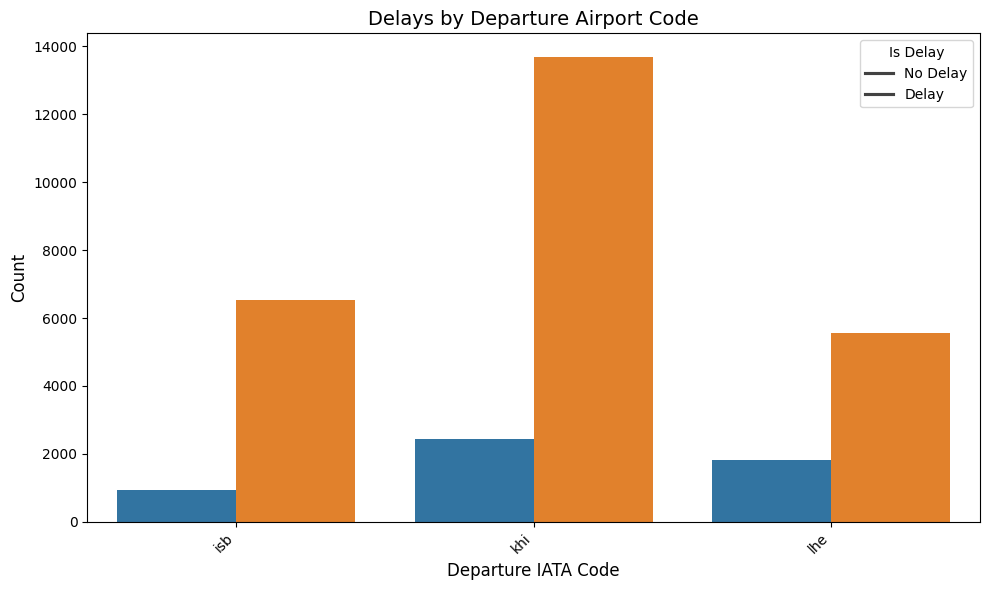

is_delay            Delay (%)  No Delay (%)
departure_iataCode                         
isb                 87.521733     12.478267
khi                 84.934566     15.065434
lhe                 75.196211     24.803789


In [740]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter and clean data for plotting
df_cleaned = df.dropna(subset=['departure_iataCode', 'is_delay'])
df_cleaned['is_delay'] = df_cleaned['is_delay'].astype(int)  # Ensure is_delay is numeric

df_test_cleaned = test.dropna()

# Create a grouped DataFrame for counts
grouped = df_cleaned.groupby(['departure_iataCode', 'is_delay']).size().reset_index(name='count')

custom_palette = ['#1f77b4', '#ff7f0e']
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='departure_iataCode', y='count', hue='is_delay', palette=custom_palette)
plt.title('Delays by Departure Airport Code', fontsize=14)
plt.xlabel('Departure IATA Code', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Is Delay', labels=['No Delay', 'Delay'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# Calculate total flights and percentage of delay/no delay for each city
percentages = grouped.pivot(index='departure_iataCode', columns='is_delay', values='count')
percentages = percentages.fillna(0)  # Handle any missing data
percentages['Total'] = percentages.sum(axis=1)
percentages['Delay (%)'] = (percentages[1.0] / percentages['Total']) * 100
percentages['No Delay (%)'] = (percentages[0.0] / percentages['Total']) * 100

# Print the results
print(percentages[['Delay (%)', 'No Delay (%)']].sort_values(by='Delay (%)', ascending=False))



# categorize hours into high/low delay

C:\Users\Muhammad Umer\AppData\Local\Temp\ipykernel_13396\296987929.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['scheduled_hour'] = pd.to_datetime(df_cleaned['departure_scheduledTime'], errors='coerce').dt.hour
C:\Users\Muhammad Umer\AppData\Local\Temp\ipykernel_13396\296987929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['scheduled_hour'] = pd.to_datetime(df_cleaned['departure_scheduledTime'], errors='coerce').dt.hour


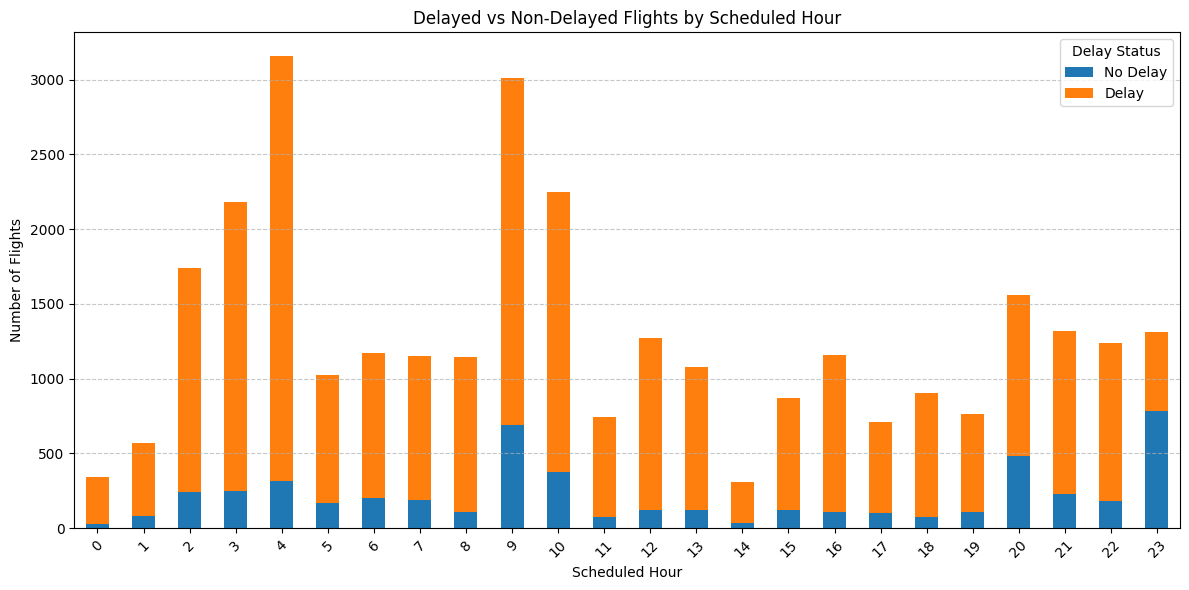

In [741]:

df_cleaned['scheduled_hour'] = pd.to_datetime(df_cleaned['departure_scheduledTime'], errors='coerce').dt.hour


df_test_cleaned['scheduled_hour'] = pd.to_datetime(df_test_cleaned['Scheduled Time'], errors='coerce').dt.hour


# Group data by scheduled hour and delay status
hourly_delay = df_cleaned.groupby(['scheduled_hour', 'is_delay']).size().unstack(fill_value=0)

# Plotting
hourly_delay.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Delayed vs Non-Delayed Flights by Scheduled Hour')
plt.xlabel('Scheduled Hour')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.legend(['No Delay', 'Delay'], title='Delay Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [742]:
df_cleaned['departure_scheduledTime'] = pd.to_datetime(df_cleaned['departure_scheduledTime'], errors='coerce')

df_test_cleaned['Scheduled Time'] = pd.to_datetime(df_test_cleaned['Scheduled Time'], errors='coerce')

# Now process and print the percentage and volume for each hour
for hour in range(24):  # Iterate through hours 0 to 23
    # Filter rows for the specific hour
    hour_data = df_cleaned[df_cleaned['departure_scheduledTime'].dt.hour == hour]
    
    # Count the 'No Delay' and 'Delay' occurrences
    no_delay_count = (hour_data['is_delay'] == 0).sum()
    delay_count = (hour_data['is_delay'] == 1).sum()
    
    # Get the percentage of no delay and delay
    total_count = no_delay_count + delay_count
    # if total_count > 1000:
        
    if total_count > 0:  # To avoid division by zero
        no_delay_percentage = (no_delay_count / total_count) * 100
        delay_percentage = (delay_count / total_count) * 100
    else:
        no_delay_percentage = 0
        delay_percentage = 0
    
    # Print results for the hour
    print(f"Hour: {hour}   No: {no_delay_percentage:.2f}%    Delay: {delay_percentage:.2f}% (Volume: {total_count})")
    print()


Hour: 0   No: 7.89%    Delay: 92.11% (Volume: 342)

Hour: 1   No: 13.88%    Delay: 86.12% (Volume: 569)

Hour: 2   No: 13.96%    Delay: 86.04% (Volume: 1741)

Hour: 3   No: 11.27%    Delay: 88.73% (Volume: 2182)

Hour: 4   No: 10.10%    Delay: 89.90% (Volume: 3158)

Hour: 5   No: 16.47%    Delay: 83.53% (Volume: 1026)

Hour: 6   No: 17.22%    Delay: 82.78% (Volume: 1173)

Hour: 7   No: 16.68%    Delay: 83.32% (Volume: 1151)

Hour: 8   No: 9.46%    Delay: 90.54% (Volume: 1142)

Hour: 9   No: 22.97%    Delay: 77.03% (Volume: 3013)

Hour: 10   No: 16.59%    Delay: 83.41% (Volume: 2249)

Hour: 11   No: 10.12%    Delay: 89.88% (Volume: 741)

Hour: 12   No: 9.74%    Delay: 90.26% (Volume: 1273)

Hour: 13   No: 11.11%    Delay: 88.89% (Volume: 1080)

Hour: 14   No: 12.38%    Delay: 87.62% (Volume: 307)

Hour: 15   No: 13.81%    Delay: 86.19% (Volume: 869)

Hour: 16   No: 9.47%    Delay: 90.53% (Volume: 1161)

Hour: 17   No: 14.37%    Delay: 85.63% (Volume: 710)

Hour: 18   No: 8.50%    Delay:

C:\Users\Muhammad Umer\AppData\Local\Temp\ipykernel_13396\1882326343.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['departure_scheduledTime'] = pd.to_datetime(df_cleaned['departure_scheduledTime'], errors='coerce')
C:\Users\Muhammad Umer\AppData\Local\Temp\ipykernel_13396\1882326343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['departure_scheduledTime'] = pd.to_datetime(df_cleaned['departure_scheduledTime'], errors='coerce')


C:\Users\Muhammad Umer\AppData\Local\Temp\ipykernel_13396\2589935030.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['departure_hour'] = pd.to_datetime(df['departure_scheduledTime']).dt.hour
C:\Users\Muhammad Umer\AppData\Local\Temp\ipykernel_13396\2589935030.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test['departure_hour'] = pd.to_datetime(test['Scheduled Time']).dt.hour


<Axes: title={'center': 'Average Delay by Hour'}, xlabel='departure_hour'>

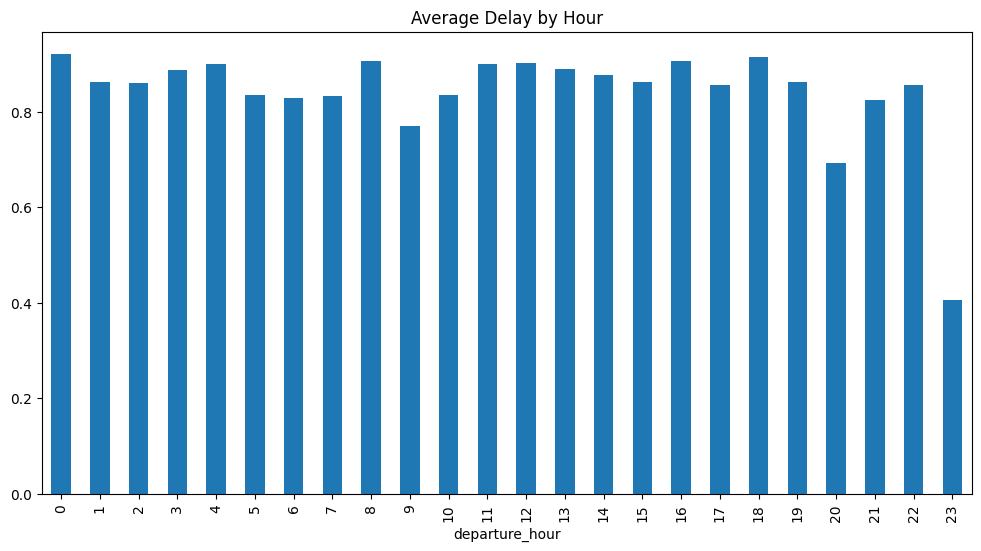

In [743]:

df['departure_hour'] = pd.to_datetime(df['departure_scheduledTime']).dt.hour

test['departure_hour'] = pd.to_datetime(test['Scheduled Time']).dt.hour

avg_delay_by_hour = df.groupby('departure_hour')['is_delay'].mean()
avg_delay_by_hour.plot(kind='bar', figsize=(12, 6), title='Average Delay by Hour')


In [744]:
def categorize_delay_hours(hour):
    if hour in [10, 19]:  # Low delay
        return 0
    elif hour in range(12, 17) or hour in range(20, 24):  # High delay
        return 2
    else:
        return 1
    


df['hours_category'] = df['departure_hour'].apply(categorize_delay_hours)

test['hours_category'] = test['departure_hour'].apply(categorize_delay_hours)


In [745]:

checking = df.dropna(subset=['is_delay', 'hours_category'])

correlation = checking[['hours_category', 'is_delay']].corr()
correlation


,hours_category,is_delay
hours_category,1.000000,-0.072936
is_delay,-0.072936,1.000000


In [746]:
# Group by departure_hour and calculate the mean delay for each hour
delay_by_hour = df.groupby('departure_hour')['is_delay'].mean()

# Sort by the delay percentage
delay_by_hour_sorted = delay_by_hour.sort_values(ascending=False)

# Display the hours with the highest delay chances
print(delay_by_hour_sorted)


departure_hour
0     0.921053
18    0.915011
8     0.905429
16    0.905254
12    0.902592
4     0.898987
11    0.898785
13    0.888889
3     0.887259
14    0.876221
15    0.861910
19    0.861438
1     0.861160
2     0.860425
17    0.856338
22    0.855878
5     0.835283
10    0.834149
7     0.833189
6     0.827792
21    0.823708
9     0.770329
20    0.691864
23    0.405179
Name: is_delay, dtype: float64


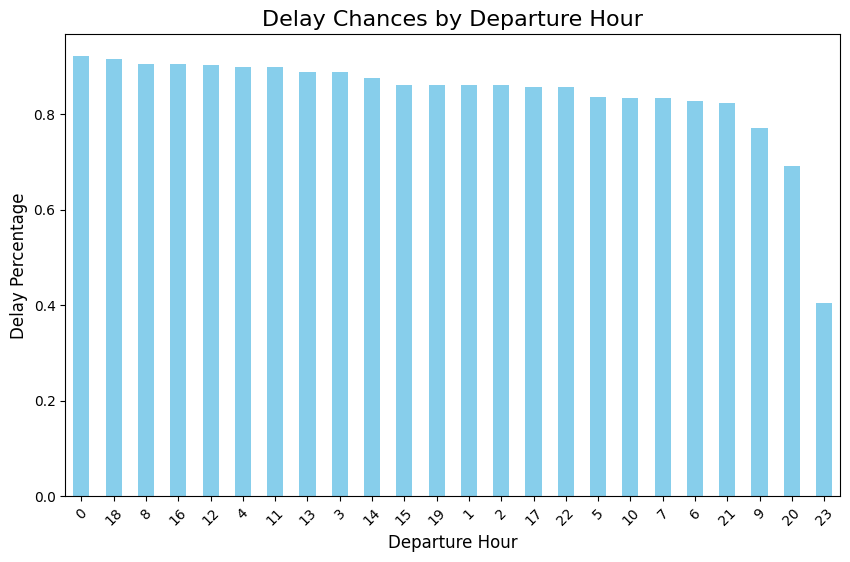

In [747]:

# Plot the delay percentages
plt.figure(figsize=(10, 6))
delay_by_hour_sorted.plot(kind='bar', color='skyblue')

plt.title('Delay Chances by Departure Hour', fontsize=16)
plt.xlabel('Departure Hour', fontsize=12)
plt.ylabel('Delay Percentage', fontsize=12)
plt.xticks(rotation=45)
plt.show()


C:\Users\Muhammad Umer\AppData\Local\Temp\ipykernel_13396\1577368765.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tempDF['departure_hour'] = pd.to_datetime(tempDF['departure_scheduledTime']).dt.hour


KMeans Correlation:
                 kmeans_cluster  is_delay
kmeans_cluster         1.00000  -0.08329
is_delay              -0.08329   1.00000

Hierarchical Clustering Correlation:
                       hierarchical_cluster  is_delay
hierarchical_cluster              1.000000  0.096545
is_delay                          0.096545  1.000000


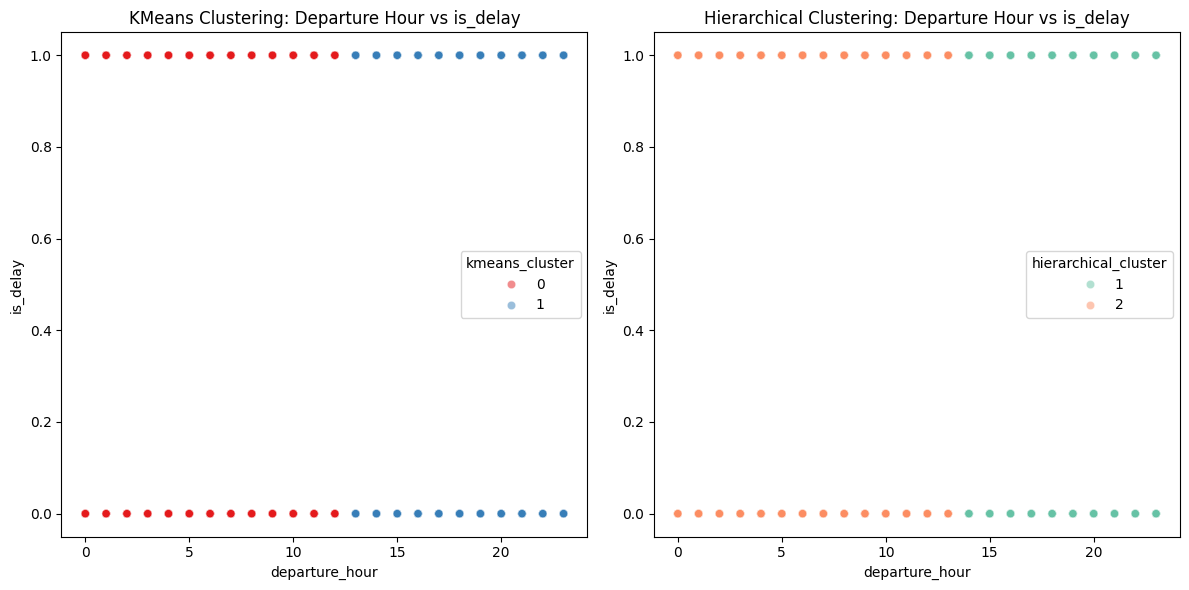

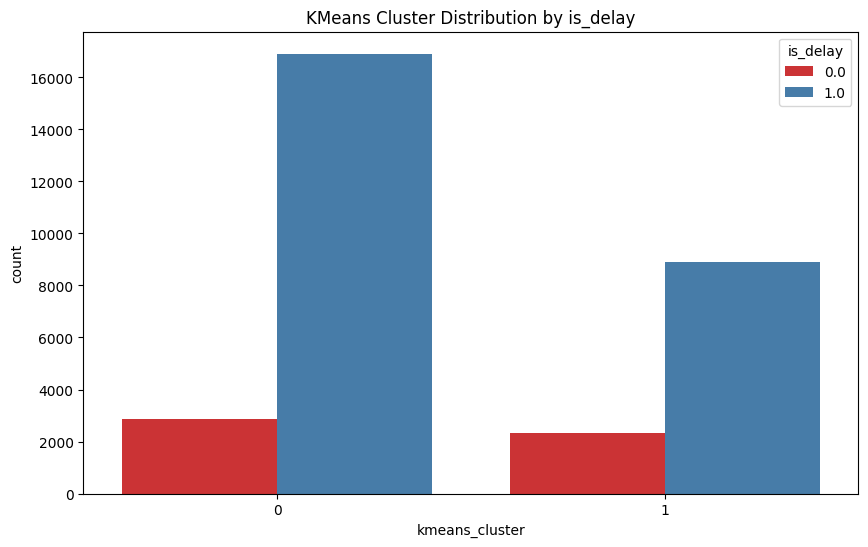

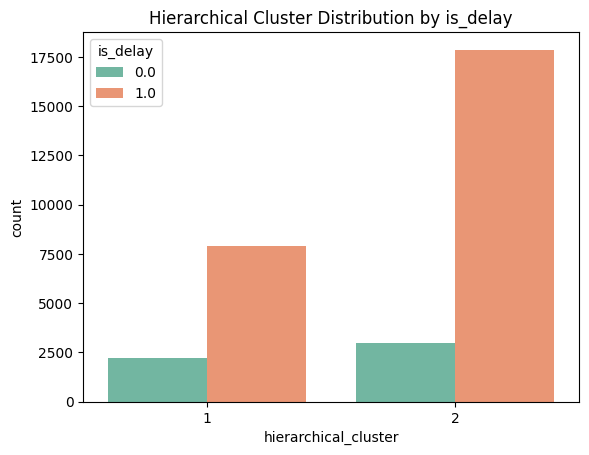

In [748]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

tempDF = df.copy()

# Step 1: Extract the 'departure_hour' from 'departure_scheduledTime' if not already done
tempDF['departure_hour'] = pd.to_datetime(tempDF['departure_scheduledTime']).dt.hour

# Step 2: Normalize the 'departure_hour' feature
scaler = StandardScaler()
tempDF['departure_hour_scaled'] = scaler.fit_transform(tempDF[['departure_hour']])

# Step 3: KMeans Clustering with 2 Clusters
kmeans = KMeans(n_clusters=2, random_state=42)
tempDF['kmeans_cluster'] = kmeans.fit_predict(tempDF[['departure_hour_scaled']])

# Step 4: Hierarchical Clustering with 2 Clusters
linkage_matrix = linkage(tempDF[['departure_hour_scaled']], method='ward')
tempDF['hierarchical_cluster'] = fcluster(linkage_matrix, t=2, criterion='maxclust')

# Step 5: Calculate Correlations
kmeans_correlation = tempDF[['kmeans_cluster', 'is_delay']].corr()
hierarchical_correlation = tempDF[['hierarchical_cluster', 'is_delay']].corr()

# Display correlations
print("KMeans Correlation:\n", kmeans_correlation)
print("\nHierarchical Clustering Correlation:\n", hierarchical_correlation)

# Step 6: Visualizing Clusters from KMeans and Hierarchical Clustering
plt.figure(figsize=(12, 6))

# KMeans Clustering Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x='departure_hour', y='is_delay', data=tempDF, hue='kmeans_cluster', palette='Set1', alpha=0.5)
plt.title('KMeans Clustering: Departure Hour vs is_delay')

# Hierarchical Clustering Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x='departure_hour', y='is_delay', data=tempDF, hue='hierarchical_cluster', palette='Set2', alpha=0.5)
plt.title('Hierarchical Clustering: Departure Hour vs is_delay')

plt.tight_layout()
plt.show()

# Step 7: Additional Graphs - Cluster Distribution by is_delay
plt.figure(figsize=(10, 6))

# KMeans cluster distribution
sns.countplot(x='kmeans_cluster', hue='is_delay', data=tempDF, palette='Set1')
plt.title('KMeans Cluster Distribution by is_delay')
plt.show()

# Hierarchical cluster distribution
sns.countplot(x='hierarchical_cluster', hue='is_delay', data=tempDF, palette='Set2')
plt.title('Hierarchical Cluster Distribution by is_delay')
plt.show()


In [749]:
# Display the departure_hours that belong to each hierarchical cluster
cluster_1_departure_hours = tempDF[tempDF['hierarchical_cluster'] == 1]['departure_hour']
cluster_2_departure_hours = tempDF[tempDF['hierarchical_cluster'] == 2]['departure_hour']

# Print the unique departure_hours for each cluster
print("Cluster 1 Departure Hours:")
print(cluster_1_departure_hours.unique())

print("Cluster 2 Departure Hours:")
print(cluster_2_departure_hours.unique())


Cluster 1 Departure Hours:
[20 15 23 22 21 16 19 17 14 18]
Cluster 2 Departure Hours:
[ 9 11 10  4  3  8  5 13  1  2  0  7  6 12]


In [750]:

delay_chance_category = {hour: 'high' if chance >= 0.86 else 'low' 
                        for hour, chance in delay_by_hour_sorted.items()}


# Add the categories to the DataFrame
df['hours_cate'] = df['departure_hour'].map(delay_chance_category)

test['hours_cate'] = test['departure_hour'].map(delay_chance_category)

df[['departure_hour', 'hours_category']].head()


,departure_hour,hours_category
0,20,2
1,15,2
2,9,1
3,23,2
4,11,1


In [751]:
# Define the departure hours for each cluster
cluster_1_hours = [20, 15, 23, 22, 21, 16, 19, 17, 14, 18]
cluster_2_hours = [9, 11, 10, 4, 3, 8, 5, 13, 1, 2, 0, 7, 6, 12]

# Function to assign category based on departure_hour
def assign_hour_category(departure_hour):
    if departure_hour in cluster_1_hours:
        return 0
    else:
        return 1

# Apply the function to both train and test data
df['hours_category'] = df['departure_hour'].apply(assign_hour_category)
test['hours_category'] = test['departure_hour'].apply(assign_hour_category)

# Check the new column in both train and test data
print(df[['departure_hour', 'hours_category']].head())
test[['departure_hour', 'hours_category']].head()


   departure_hour  hours_category
0              20               0
1              15               0
2               9               1
3              23               0
4              11               1


,departure_hour,hours_category
0,0,1
1,4,1
2,3,1
3,2,1
4,4,1


In [752]:

checking = df.dropna(subset=['is_delay', 'hours_cate'])
checking.loc[:, 'delay_chance_numeric'] = checking['hours_cate'].map({'high': 1, 'low': 0})

# Drop rows with NaN values in 'delay_chance_numeric' or 'is_delay'
checking = checking.dropna(subset=['delay_chance_numeric', 'is_delay'])

# Calculate correlation
correlation = checking[['delay_chance_numeric', 'is_delay']].corr()

# Display the correlation
print(correlation)



                      delay_chance_numeric  is_delay
delay_chance_numeric              1.000000  0.160812
is_delay                          0.160812  1.000000


C:\Users\Muhammad Umer\AppData\Local\Temp\ipykernel_13396\547909291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checking.loc[:, 'delay_chance_numeric'] = checking['hours_cate'].map({'high': 1, 'low': 0})


In [753]:

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full column content
pd.set_option('display.width', None)  # Prevent line wrapping

df.head()

,type,status,departure_iataCode,departure_terminal,departure_scheduledTime,departure_estimatedTime,departure_actualTime,arrival_iataCode,arrival_terminal,arrival_scheduledTime,arrival_estimatedTime,airline_name,airline_icaoCode,flight_number,flight_icaoNumber,arrival_baggage,codeshared_airline_name,codeshared_airline_icaoCode,codeshared_flight_number,codeshared_flight_icaoNumber,arrival_actualTime,departure_scheduledDate,departure_actualDate,departure_estimatedRunwayDate,departure_estimatedRunwayTime,departure_actualRunwayDate,departure_actualRunwayTime,arrival_scheduledDate,arrival_estimatedDate,arrival_estimatedRunwayDate,arrival_estimatedRunwayTime,arrival_actualRunwayDate,arrival_actualRunwayTime,Time,Temperature (°F)_Avg,Dew Point (°F)_Avg,Dew Point (°F)_Min,Humidity (%)_Avg,Humidity (%)_Min,Wind Speed (mph)_Avg,Pressure (in)_Avg,Pressure (in)_Min,Pressure (in)_Max,is_delay,delay_minutes,delay_category,departure_hour,hours_category,hours_cate
0,departure,active,lhe,m,20:50:00,2023-07-20t20:00:00.000,20:15:00,ruh,4,23:20:00,21:54:00,saudia,sva,737,sva737,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-20,2023-07-20,2023-07-20,20:15:00,2023-07-20,20:15:00,2023-07-20,2023-07-20,NaN,NaN,NaN,NaN,2023-07-20,88.2,79.8,77,76.0,63,5.3,28.8,28.7,28.9,0.0,0.0,No Delay,20,0,low
1,departure,active,lhe,NaN,15:05:00,2023-07-18t15:05:00.000,NaN,khi,NaN,16:50:00,NaN,flyjinnah,fjl,843,fjl843,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-18,NaN,NaN,NaN,NaN,NaN,2023-07-18,NaN,NaN,NaN,NaN,NaN,2023-07-18,89.4,80.1,77,73.8,63,10.2,28.8,28.7,28.8,NaN,NaN,NaN,15,0,high
2,departure,active,lhe,NaN,09:50:00,NaN,NaN,khi,NaN,11:35:00,NaN,flyjinnah,fjl,841,fjl841,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-23,NaN,NaN,NaN,NaN,NaN,2023-07-23,NaN,NaN,NaN,NaN,NaN,2023-07-23,86.6,75.8,73,71.2,56,8.1,28.9,28.8,29.0,NaN,NaN,NaN,9,1,low
3,departure,active,lhe,m,23:30:00,2023-07-26t23:30:00.000,23:51:00,kwi,NaN,01:30:00,01:24:00,pakistan international airlines,pia,205,pia205,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-26,2023-07-26,2023-07-26,23:51:00,2023-07-26,23:51:00,2023-07-27,2023-07-27,NaN,NaN,NaN,NaN,2023-07-26,86.9,78.9,75,77.4,59,8.1,28.9,28.8,28.9,1.0,21.0,Short Delay,23,0,low
4,departure,active,lhe,m,11:35:00,2023-07-20t17:15:00.000,NaN,dxb,1,14:00:00,NaN,serene air,sep,723,sep723,03,NaN,NaN,NaN,NaN,NaN,2023-07-20,NaN,NaN,NaN,NaN,NaN,2023-07-20,NaN,NaN,NaN,NaN,NaN,2023-07-20,88.2,79.8,77,76.0,63,5.3,28.8,28.7,28.9,NaN,NaN,NaN,11,1,high


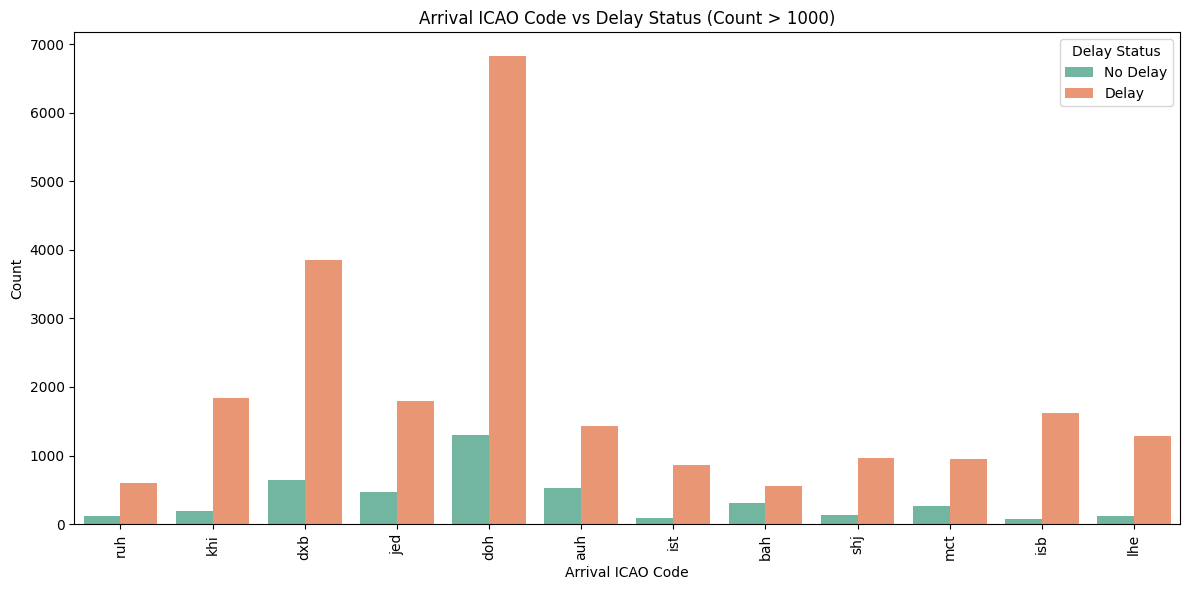

In [754]:

filtered_data = df['arrival_iataCode'].value_counts()
filtered_codes = filtered_data[filtered_data > 1000].index

# Filter the original data to include only those rows where arrival_icaoCode has count > 1000
filtered_temp = df[df['arrival_iataCode'].isin(filtered_codes)]

# Plotting arrival_icaoCode vs is_delay
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_temp, x='arrival_iataCode', hue='is_delay', palette='Set2')

# Customizing plot
plt.title('Arrival ICAO Code vs Delay Status (Count > 1000)')
plt.xlabel('Arrival ICAO Code')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.legend(title='Delay Status', labels=['No Delay', 'Delay'])

# Show the plot
plt.tight_layout()
plt.show()


In [755]:
# Step 1: Group by 'arrival_icaoCode' and 'is_delay', then calculate size
delay_stats = filtered_temp.groupby(['arrival_iataCode', 'is_delay']).size().unstack(fill_value=0)

# Step 2: Calculate the percentage of 'No Delay' (0) and 'Delay' (1)
delay_stats_percentage = (delay_stats.T / delay_stats.sum(axis=1)).T * 100

# Step 3: Rename the columns to represent the percentages
delay_stats_percentage.columns = ['No Delay Percentage', 'Delay Percentage']

# Step 4: Calculate the total volume (count) per 'arrival_icaoCode'
total_volume = filtered_temp.groupby('arrival_iataCode').size()

# Step 5: Join the delay stats percentage with the total volume
final_result = delay_stats_percentage.join(total_volume.rename('Total Volume'))

# Step 6: Display the final result
print(final_result)


                  No Delay Percentage  Delay Percentage  Total Volume
arrival_iataCode                                                     
auh                         26.985743         73.014257          2868
bah                         35.589265         64.410735          1117
doh                         16.048169         83.951831         11036
dxb                         14.304783         85.695217          7100
isb                          4.073200         95.926800          2834
ist                          9.206349         90.793651          1590
jed                         20.748899         79.251101          3942
khi                          9.650419         90.349581          4905
lhe                          8.433735         91.566265          2435
mct                         21.422663         78.577337          1686
ruh                         16.920943         83.079057          1291
shj                         11.538462         88.461538          1625


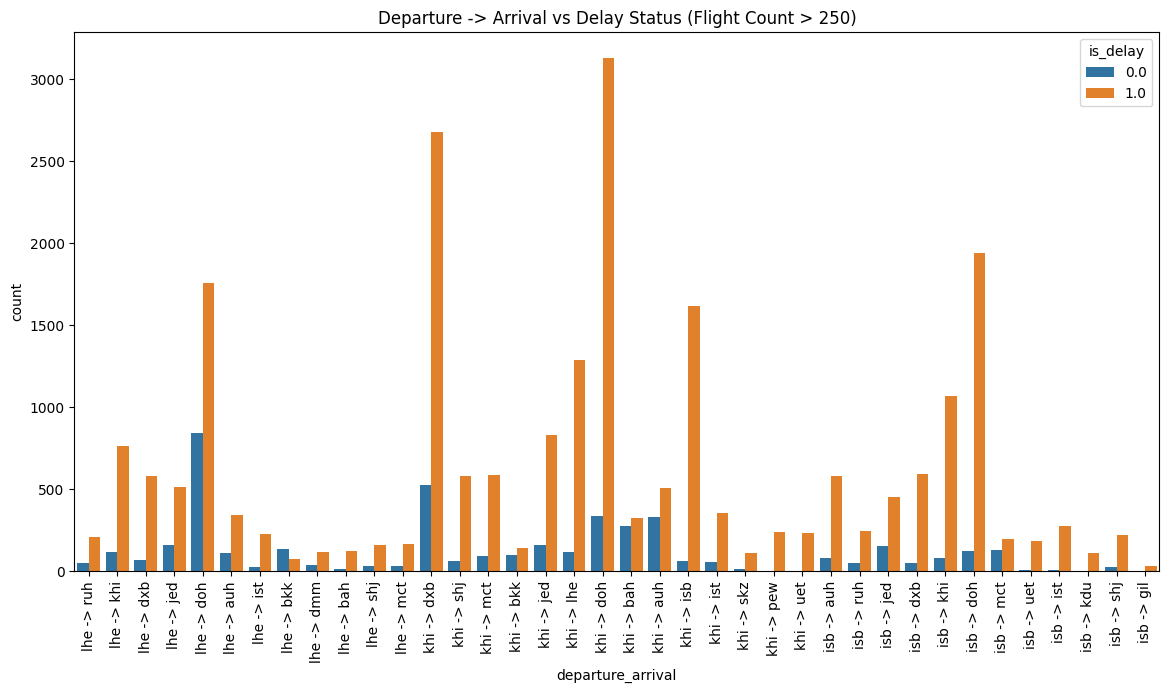

In [756]:
# Combine 'departure_iataCode' and 'arrival_icaoCode' into a new column
df['departure_arrival'] = df['departure_iataCode'] + ' -> ' + df['arrival_iataCode']


test['departure_arrival'] = test['Departure IATA Code'] + ' -> ' + test['Arrival IATA Code']

# Group by 'departure_iataCode' and 'arrival_icaoCode' to get the count of flights
flight_counts = df.groupby(['departure_iataCode', 'arrival_iataCode']).size().reset_index(name='flight_count')

# Filter for combinations where the count of flights is more than 250
filtered_flight_counts = flight_counts[flight_counts['flight_count'] > 250]

# Merge the filtered flight counts with the original dataframe to keep the relevant rows
filtered_df = df.merge(filtered_flight_counts[['departure_iataCode', 'arrival_iataCode']], 
                    on=['departure_iataCode', 'arrival_iataCode'])

# Countplot for combined 'departure_iataCode' and 'arrival_icaoCode' vs Delay Status for filtered data
plt.figure(figsize=(14, 7))
sns.countplot(x='departure_arrival', hue='is_delay', data=filtered_df)
plt.title('Departure -> Arrival vs Delay Status (Flight Count > 250)')
plt.xticks(rotation=90)
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encode the 'departure_arival' column
label_encoder = LabelEncoder()
df['departure_arrival_encoded'] = label_encoder.fit_transform(df['departure_arrival'])
test['departure_arrival_encoded'] = label_encoder.fit_transform(test['departure_arrival'])

# Now calculate correlation between the encoded 'departure_arrival' and 'is_delay'
correlation = df['departure_arrival_encoded'].corr(df['is_delay'])

print(f"Correlation between departure_arrival and is_delay: {correlation}")


Correlation between departure_arrival and is_delay: -0.08716603982605604


In [758]:
def categorize_airport_delay_risk(no_delay_percentage):
    if no_delay_percentage <= 10:
        return 'extremely_high_risk'
    elif no_delay_percentage <= 20:
        return 'high_risk'
    elif no_delay_percentage <= 30:
        return 'moderate_risk'
    else:
        return 'low_risk'

# Create temporary DataFrame for analysis
temp_df = df.copy()

# Example calculation of `no_delay_percentage` assuming no_delay_percentage is based on delay_minutes
temp_df['no_delay_percentage'] = (1 - (temp_df['delay_minutes'] / temp_df['delay_minutes'].max())) * 100

# Apply the categorization
temp_df['airport_delay_risk'] = temp_df['no_delay_percentage'].apply(categorize_airport_delay_risk)



In [759]:
# Assuming `total_volume` is available, if not, substitute with an appropriate column
def calculate_weighted_delay_score(no_delay_percentage, total_volume):
    return (100 - no_delay_percentage) * (total_volume / 1000)

# Assuming we calculate total_volume from available data or substitute it with another feature
temp_df['total_volume'] = temp_df['delay_minutes']  # Example of using delay minutes as proxy for volume

# Apply the weighted delay score
temp_df['airport_weighted_delay_score'] = temp_df.apply(
    lambda row: calculate_weighted_delay_score(
        row['no_delay_percentage'], 
        row['total_volume']
    ), 
    axis=1
)


In [760]:
# Assuming no_delay_percentage is already available or calculated
def encode_delay_probability(no_delay_percentage):
    return no_delay_percentage / 100

# Apply the encoding
temp_df['airport_delay_probability'] = temp_df['no_delay_percentage'].apply(encode_delay_probability)


In [761]:

temp_df[temp_df['is_delay'].notna()].head(3)


,type,status,departure_iataCode,departure_terminal,departure_scheduledTime,departure_estimatedTime,departure_actualTime,arrival_iataCode,arrival_terminal,arrival_scheduledTime,arrival_estimatedTime,airline_name,airline_icaoCode,flight_number,flight_icaoNumber,arrival_baggage,codeshared_airline_name,codeshared_airline_icaoCode,codeshared_flight_number,codeshared_flight_icaoNumber,arrival_actualTime,departure_scheduledDate,departure_actualDate,departure_estimatedRunwayDate,departure_estimatedRunwayTime,departure_actualRunwayDate,departure_actualRunwayTime,arrival_scheduledDate,arrival_estimatedDate,arrival_estimatedRunwayDate,arrival_estimatedRunwayTime,arrival_actualRunwayDate,arrival_actualRunwayTime,Time,Temperature (°F)_Avg,Dew Point (°F)_Avg,Dew Point (°F)_Min,Humidity (%)_Avg,Humidity (%)_Min,Wind Speed (mph)_Avg,Pressure (in)_Avg,Pressure (in)_Min,Pressure (in)_Max,is_delay,delay_minutes,delay_category,departure_hour,hours_category,hours_cate,departure_arrival,departure_arrival_encoded,no_delay_percentage,airport_delay_risk,total_volume,airport_weighted_delay_score,airport_delay_probability
0,departure,active,lhe,m,20:50:00,2023-07-20t20:00:00.000,20:15:00,ruh,4,23:20:00,21:54:00,saudia,sva,737,sva737,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-20,2023-07-20,2023-07-20,20:15:00,2023-07-20,20:15:00,2023-07-20,2023-07-20,NaN,NaN,NaN,NaN,2023-07-20,88.2,79.8,77,76.0,63,5.3,28.8,28.7,28.9,0.0,0.0,No Delay,20,0,low,lhe -> ruh,149,100.000000,low_risk,0.0,0.000000,1.000000
3,departure,active,lhe,m,23:30:00,2023-07-26t23:30:00.000,23:51:00,kwi,NaN,01:30:00,01:24:00,pakistan international airlines,pia,205,pia205,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-26,2023-07-26,2023-07-26,23:51:00,2023-07-26,23:51:00,2023-07-27,2023-07-27,NaN,NaN,NaN,NaN,2023-07-26,86.9,78.9,75,77.4,59,8.1,28.9,28.8,28.9,1.0,21.0,Short Delay,23,0,low,lhe -> kwi,140,67.692308,low_risk,21.0,0.678462,0.676923
10,departure,active,lhe,NaN,10:45:00,2023-07-24t10:45:00.000,10:54:00,bgw,NaN,13:10:00,12:44:00,fly baghdad,fba,344,fba344,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-24,2023-07-24,2023-07-24,10:54:00,2023-07-24,10:54:00,2023-07-24,2023-07-24,NaN,NaN,NaN,NaN,2023-07-24,87.3,78.2,75,74.3,60,7.5,28.9,28.8,28.9,1.0,9.0,Short Delay,10,1,low,lhe -> bgw,117,86.153846,low_risk,9.0,0.124615,0.861538


In [762]:

temp_df_sorted = temp_df.sort_values(by='no_delay_percentage', ascending=False)

# Get the counts of unique values in 'no_delay_percentage'
value_counts_sorted = temp_df_sorted["no_delay_percentage"].value_counts().sort_index(ascending=False)

print(value_counts_sorted)


no_delay_percentage
356.923077       1
333.846154       2
213.846154       1
100.000000    5195
98.461538      616
              ... 
15.384615       19
13.846154       11
12.307692        2
10.769231        1
0.000000         2
Name: count, Length: 63, dtype: int64


is_delay
1.0    25795
0.0     5195
Name: count, dtype: int64
no_delay_percentage
100.000000    5195
84.615385     1290
81.538462     1205
83.076923     1172
87.692308     1168
              ... 
0.000000         2
333.846154       2
356.923077       1
10.769231        1
213.846154       1
Name: count, Length: 63, dtype: int64


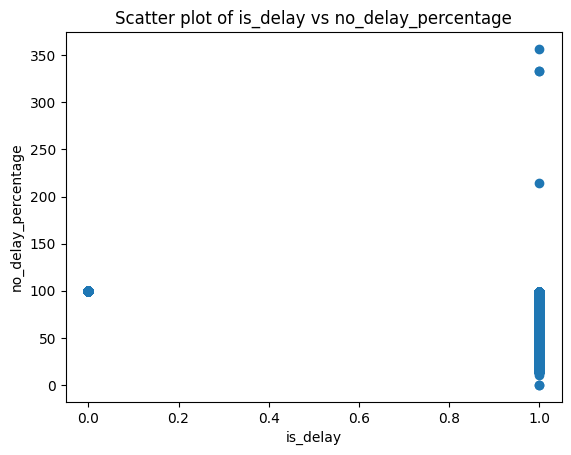

In [763]:

temp_df = temp_df.dropna(subset=['is_delay'])


print(temp_df['is_delay'].value_counts())  # Check unique values in 'is_delay'
print(temp_df['no_delay_percentage'].value_counts())  # Check unique values in 'no_delay_percentage'

temp_df['is_delay'].corr(temp_df['no_delay_percentage'])

import matplotlib.pyplot as plt

plt.scatter(temp_df['is_delay'], temp_df['no_delay_percentage'])
plt.xlabel('is_delay')
plt.ylabel('no_delay_percentage')
plt.title('Scatter plot of is_delay vs no_delay_percentage')
plt.show()



                              is_delay  no_delay_percentage  \
is_delay                       1.00000            -0.511470   
no_delay_percentage           -0.51147             1.000000   
airport_delay_risk                 NaN                  NaN   
airport_weighted_delay_score   0.26225            -0.735084   
airport_delay_probability     -0.51147             1.000000   

                              airport_delay_risk  \
is_delay                                     NaN   
no_delay_percentage                          NaN   
airport_delay_risk                           NaN   
airport_weighted_delay_score                 NaN   
airport_delay_probability                    NaN   

                              airport_weighted_delay_score  \
is_delay                                          0.262250   
no_delay_percentage                              -0.735084   
airport_delay_risk                                     NaN   
airport_weighted_delay_score                      1.000000  

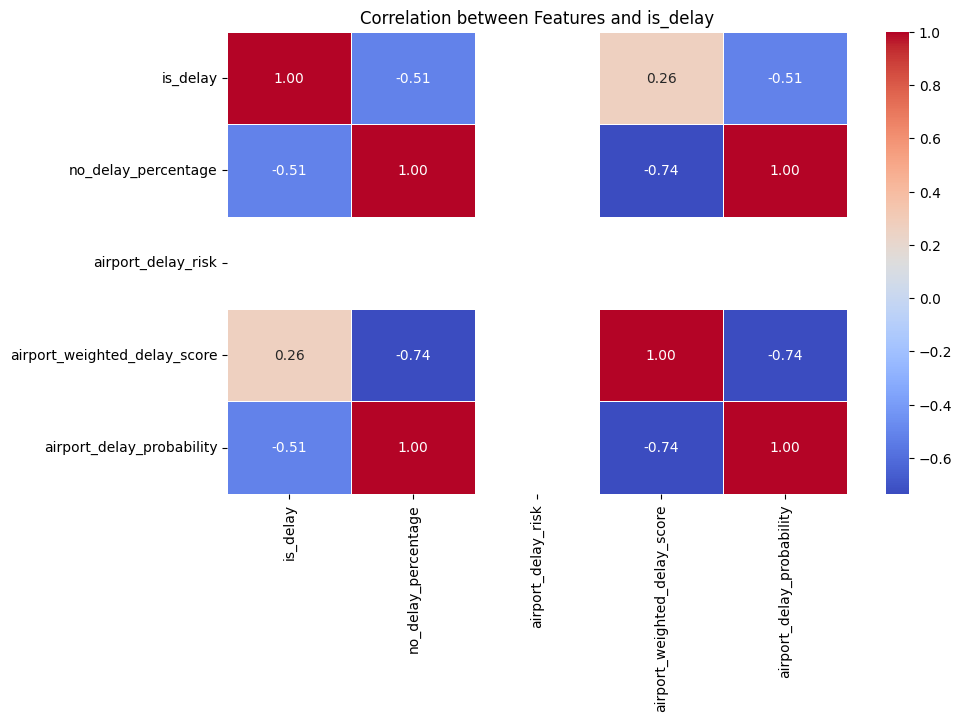

In [764]:
# Correlation matrix
temp_df = temp_df.dropna(subset=['is_delay', 'no_delay_percentage', 'airport_delay_risk', 'airport_weighted_delay_score', 'airport_delay_probability'])
correlation_matrix = temp_df[['is_delay', 'no_delay_percentage', 'airport_delay_risk', 'airport_weighted_delay_score', 'airport_delay_probability']].apply(pd.to_numeric, errors='coerce').corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation between Features and is_delay")
plt.show()


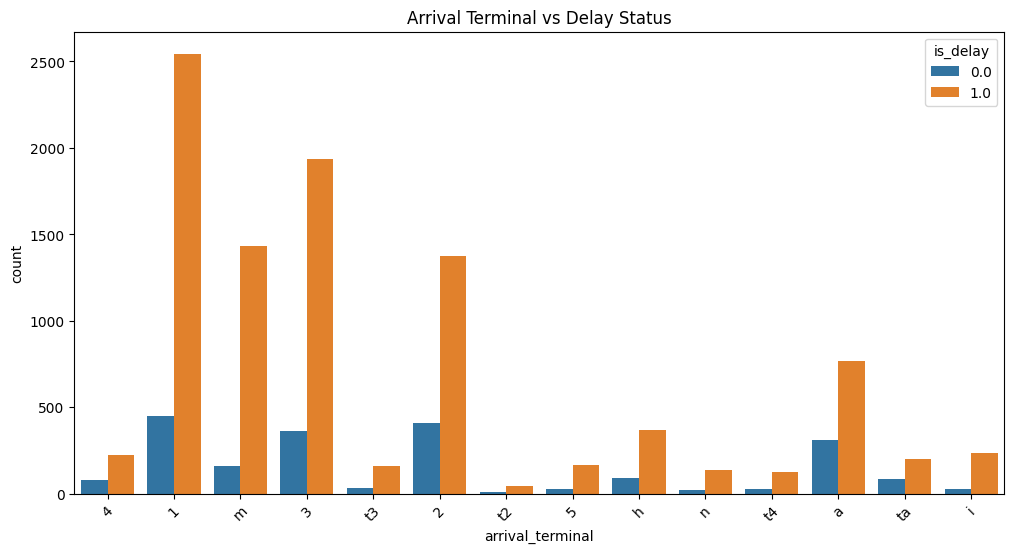

In [765]:
# Countplot for Arrival Terminal vs Delay Status
plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_terminal', hue='is_delay', data=df)
plt.title('Arrival Terminal vs Delay Status')
plt.xticks(rotation=45)
plt.show()


In [766]:
# Grouping by 'arrival_terminal' and 'is_delay' to get counts
delay_counts = df.groupby(['arrival_terminal', 'is_delay']).size().unstack(fill_value=0)

# Calculate total flights per terminal
delay_counts['total'] = delay_counts.sum(axis=1)

# Calculate the percentage of delays and no delays
delay_counts['delay_percentage'] = (delay_counts[1] / delay_counts['total']) * 100
delay_counts['no_delay_percentage'] = (delay_counts[0] / delay_counts['total']) * 100

# Display the results
print(delay_counts[['total', 'delay_percentage', 'no_delay_percentage']])


is_delay          total  delay_percentage  no_delay_percentage
arrival_terminal                                              
1                  2996         84.946595            15.053405
2                  1784         77.130045            22.869955
3                  2299         84.254023            15.745977
4                   303         73.927393            26.072607
5                   192         87.500000            12.500000
a                  1077         71.030641            28.969359
h                   457         80.525164            19.474836
i                   266         89.097744            10.902256
m                  1591         90.006285             9.993715
n                   154         87.012987            12.987013
t2                   55         81.818182            18.181818
t3                  194         81.958763            18.041237
t4                  156         81.410256            18.589744
ta                  285         70.175439            29

In [767]:

df['arrival_terminal_encoded'] = df['arrival_terminal'].astype('category').cat.codes


# Calculate the correlation
correlation = df[['arrival_terminal_encoded', 'is_delay']].corr()
print(correlation)


df['departure_terminal_encoded'] = df['departure_terminal'].astype('category').cat.codes


# Calculate the correlation
correlation = df[['departure_terminal_encoded', 'is_delay']].corr()
print(correlation)

                          arrival_terminal_encoded  is_delay
arrival_terminal_encoded                  1.000000 -0.013743
is_delay                                 -0.013743  1.000000
                            departure_terminal_encoded  is_delay
departure_terminal_encoded                    1.000000 -0.064196
is_delay                                     -0.064196  1.000000


C:\Users\Muhammad Umer\AppData\Local\Temp\ipykernel_13396\409630273.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['is_delay'] = filtered_df['is_delay'].astype('category')


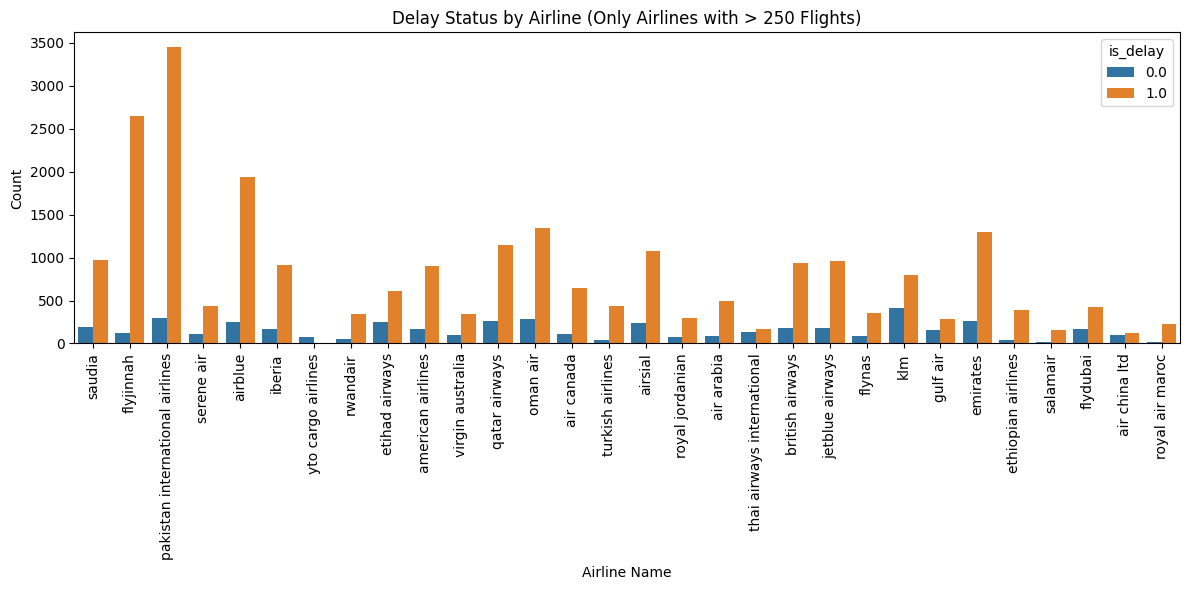

In [768]:
airline_counts = df['airline_name'].value_counts()

# Filter airlines with more than 250 flights
top_airlines = airline_counts[airline_counts > 250].index

# Filter the original dataframe to include only top airlines
filtered_df = df[df['airline_name'].isin(top_airlines)]

# Ensure 'is_delay' is treated as a categorical variable
filtered_df['is_delay'] = filtered_df['is_delay'].astype('category')

# Create the plot
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='airline_name', hue='is_delay')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Airline Name')
plt.ylabel('Count')
plt.title('Delay Status by Airline (Only Airlines with > 250 Flights)')

# Show the plot
plt.tight_layout()
plt.show()

In [769]:


airlines = df['airline_name'].unique()

# Mapping of airline names to countries
country_mapping = {
    'saudia': 'Saudi Arabia',
    'flyjinnah': 'Pakistan',
    'pakistan international airlines': 'Pakistan',
    'serene air': 'Pakistan',
    'airblue': 'Pakistan',
    'iberia': 'Spain',
    'yto cargo airlines': 'China',
    'fly baghdad': 'Iraq',
    'rwandair': 'Rwanda',
    'etihad airways': 'UAE',
    'american airlines': 'USA',
    'virgin australia': 'Australia',
    'qatar airways': 'Qatar',
    'oman air': 'Oman',
    'air canada': 'Canada',
    'turkish airlines': 'Turkey',
    'airsial': 'Pakistan',
    'royal jordanian': 'Jordan',
    'air arabia': 'UAE',
    'thai airways international': 'Thailand',
    'british airways': 'UK',
    'jetblue airways': 'USA',
    'kuwait airways': 'Kuwait',
    'flynas': 'Saudi Arabia',
    'klm': 'Netherlands',
    'gulf air': 'Bahrain',
    'jazeera airways': 'Kuwait',
    'emirates': 'UAE',
    'srilankan airlines': 'Sri Lanka',
    'ethiopian airlines': 'Ethiopia',
    'asiana airlines': 'South Korea',
    'malaysia airlines': 'Malaysia',
    'china southern airlines': 'China',
    'malindo air': 'Malaysia',
    'batik air': 'Indonesia',
    'georgian airlines': 'Georgia',
    'mahan air': 'Iran',
    'sf airlines': 'China',
    'scat airlines': 'Kazakhstan',
    'aero nomad': 'Russia',
    'azal azerbaijan airlines': 'Azerbaijan',
    'lion air': 'Indonesia',
    'somon air': 'Tajikistan',
    'salamair': 'Oman',
    'redstar aviation': 'China',
    'gulf wings': 'Bahrain',
    'compass cargo airlines': 'USA',
    'smartwings': 'Czech Republic',
    'kenya airways': 'Kenya',
    'flydubai': 'UAE',
    'gulf and caribbean cargo': 'USA',
    'fai rent-a-jet': 'Germany',
    'uls airlines cargo': 'Turkey',
    'alitalia': 'Italy',
    'danish air': 'Denmark',
    'air mauritius': 'Mauritius',
    'iraqi airways': 'Iraq',
    'iran air': 'Iran',
    'pegasus': 'Turkey',
    'air china ltd': 'China',
    'cham wings airlines': 'Syria',
    'silk way airlines': 'Azerbaijan',
    'royal air maroc': 'Morocco',
    'swiss air-ambulance': 'Switzerland',
    'qeshm airlines': 'Iran',
    'silk way west': 'Azerbaijan',
    'egyptair': 'Egypt',
    'turkey - government': 'Turkey',
    'indigo': 'India',
    'fitsair': 'North Macedonia',
    'spicejet': 'India',
    'airact': 'Hungary',
    'wamos air': 'Spain',
    'egyptair cargo': 'Egypt',
    'mng airlines': 'Turkey',
    'fly pro': 'Turkey',
    'royal brunei airlines': 'Brunei',
    'kam air': 'Afghanistan',
    'ariana afghan airlines': 'Afghanistan',
    'hi fly': 'Portugal',
    'maleth-aero': 'Malta',
    'air seychelles': 'Seychelles',
    'vistajet': 'Malta',
    'air hamburg': 'Germany',
    'evelop airlines': 'Spain',
    'privilege style': 'Spain',
    'panorama airways': 'USA',
    'gullivair': 'Spain',
    'maximus airlines': 'Russia',
    'smartlynx airlines': 'Latvia',
    'air france': 'France',
    'alexandria airlines': 'Egypt',
    'asg business aviation': 'USA',
    'harmony jets': 'USA',
    'freebird airlines': 'Turkey'
}

df['country'] = df['airline_name'].map(country_mapping)
df['country'] = df['country'].combine_first(df['codeshared_airline_name'].map(country_mapping))


test['country'] = test['airline_name'].map(country_mapping)
test['country'] = test['country'].combine_first(df['codeshared_airline_name'].map(country_mapping))

grouped_by_country = df.groupby('country').size().reset_index(name='airline_count')
grouped_by_country



,country,airline_count
0,Afghanistan,226
1,Australia,550
2,Azerbaijan,137
3,Bahrain,585
4,Brunei,1
5,Canada,1255
6,China,1334
7,Czech Republic,183
8,Denmark,165
9,Egypt,87


In [770]:

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['country_encoded'] = encoder.fit_transform(df['country'])

test['country_encoded'] = encoder.fit_transform(test['country'])

correlation = df['country_encoded'].corr(df['is_delay'])
print("Correlation between country and is_delay:", correlation)


Correlation between country and is_delay: 0.04714588388821991


In [771]:
# Group by airline_name and is_delay, then count the occurrences
airline_delay_counts = df.groupby('airline_name')['is_delay'].value_counts().unstack(fill_value=0)

# Calculate total flights per airline
airline_delay_counts['total_flights'] = airline_delay_counts.sum(axis=1)

# Calculate the percentage of delays and non-delays
airline_delay_counts['delay_percentage'] = (airline_delay_counts[1] / airline_delay_counts['total_flights']) * 100
airline_delay_counts['no_delay_percentage'] = (airline_delay_counts[0] / airline_delay_counts['total_flights']) * 100

airline_delay_counts = airline_delay_counts.sort_values('total_flights', ascending=False)

for index, row in airline_delay_counts.iterrows():
    print(f"Total: {row['total_flights']},    No Delay: {row['no_delay_percentage']},   Airline: {row.name} ")



Total: 3748.0,    No Delay: 7.950907150480256,   Airline: pakistan international airlines 
Total: 2774.0,    No Delay: 4.470079307858688,   Airline: flyjinnah 
Total: 2186.0,    No Delay: 11.482159194876488,   Airline: airblue 
Total: 1621.0,    No Delay: 17.273288093769278,   Airline: oman air 
Total: 1558.0,    No Delay: 16.43132220795892,   Airline: emirates 
Total: 1411.0,    No Delay: 18.426647767540754,   Airline: qatar airways 
Total: 1323.0,    No Delay: 18.442932728647015,   Airline: airsial 
Total: 1211.0,    No Delay: 34.02146985962015,   Airline: klm 
Total: 1165.0,    No Delay: 16.652360515021456,   Airline: saudia 
Total: 1139.0,    No Delay: 16.154521510096576,   Airline: jetblue airways 
Total: 1117.0,    No Delay: 16.472694717994628,   Airline: british airways 
Total: 1072.0,    No Delay: 15.205223880597016,   Airline: iberia 
Total: 1068.0,    No Delay: 15.636704119850187,   Airline: american airlines 
Total: 857.0,    No Delay: 28.93815635939323,   Airline: etihad ai

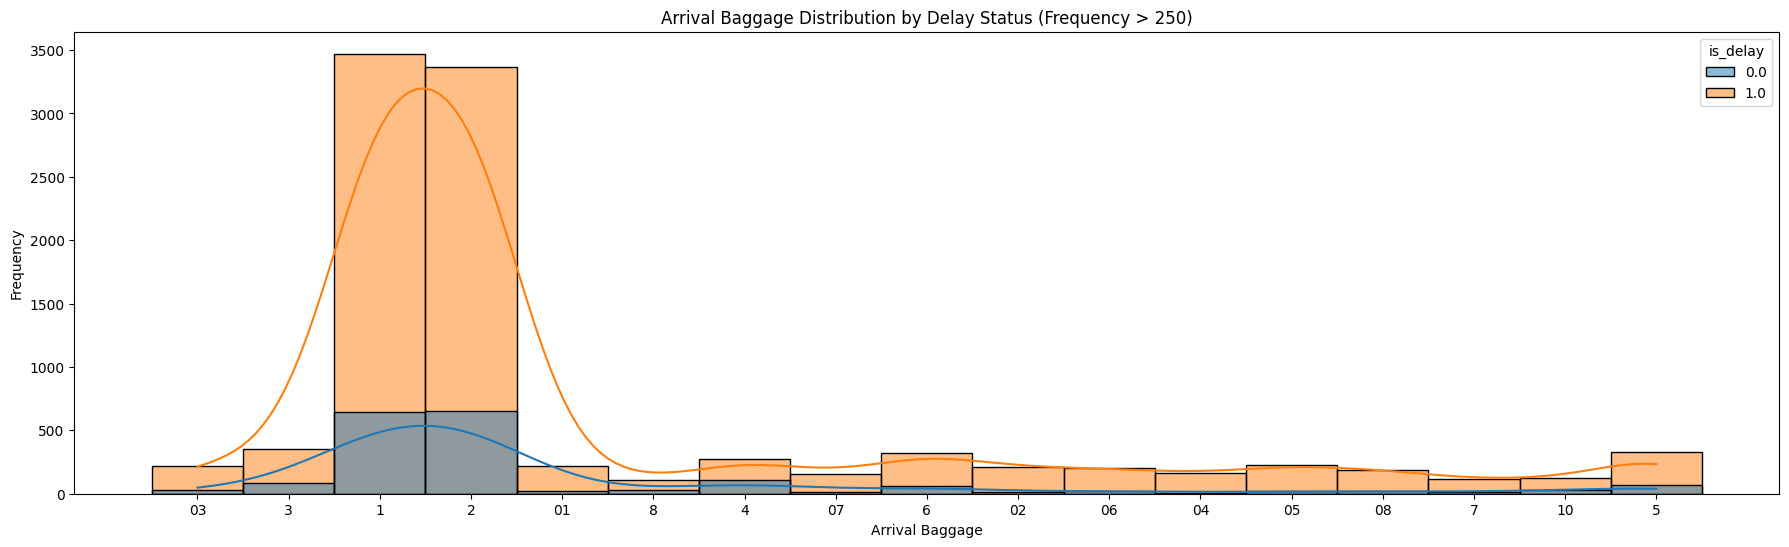

In [772]:
# Calculate the frequency of 'arrival_baggage' values
value_counts = df['arrival_baggage'].value_counts()

# Filter values with frequency more than 250
filtered_values = value_counts[value_counts > 200].index

# Filter the dataframe to include only rows with 'arrival_baggage' values > 250 frequency
filtered_df = df[df['arrival_baggage'].isin(filtered_values)]

# Plot the histogram
plt.figure(figsize=(22, 6))
sns.histplot(data=filtered_df, x='arrival_baggage', hue='is_delay', kde=True, bins=30)
plt.title('Arrival Baggage Distribution by Delay Status (Frequency > 250)')
plt.xlabel('Arrival Baggage')
plt.ylabel('Frequency')
plt.show()


In [773]:
test.columns

Index(['Flight Number', 'Type', 'Status', 'Departure IATA Code',
       'Scheduled Time', 'Arrival IATA Code', 'Arrival Estimated Time',
       'Scheduled Date', 'Arrival Estimated Date', 'airline_iataCode',
       'airline_icaoCode', 'airline_name', 'arrival_actualRunwayDate',
       'arrival_actualRunwayTime', 'arrival_actualTime', 'arrival_baggage',
       'arrival_estimatedDate', 'arrival_estimatedRunwayDate',
       'arrival_estimatedRunwayTime', 'arrival_estimatedTime', 'arrival_gate',
       'arrival_icaoCode', 'arrival_scheduledDate', 'arrival_scheduledTime',
       'arrival_terminal', 'codeshared_airline_iataCode',
       'codeshared_airline_icaoCode', 'codeshared_airline_name',
       'codeshared_flight_iataNumber', 'codeshared_flight_icaoNumber',
       'codeshared_flight_number', 'departure_actualRunwayDate',
       'departure_actualRunwayTime', 'departure_estimatedRunwayDate',
       'departure_estimatedRunwayTime', 'departure_gate', 'departure_icaoCode',
       'departure

In [774]:
df = df.drop( columns=['status', 'arrival_terminal_encoded', 'departure_arrival_encoded', 'country_encoded',
                    'departure_terminal_encoded',
                    ])

test = test.drop( columns=[  'Type' ,'status', 'Status', 'country_encoded', 'departure_arrival_encoded'])


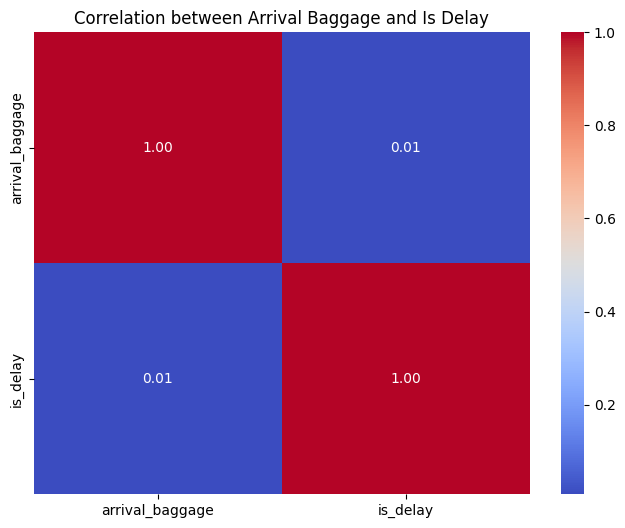

In [775]:
# Convert 'arrival_baggage' to numeric, forcing errors to NaN (if any non-numeric value exists)
df['arrival_baggage'] = pd.to_numeric(df['arrival_baggage'], errors='coerce')

# Convert 'is_delay' to numeric (assuming it's categorical with values like 'yes', 'no', or boolean)
df['is_delay'] = pd.to_numeric(df['is_delay'], errors='coerce')

# Now calculate the correlation matrix
correlation_matrix = df[['arrival_baggage', 'is_delay']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Arrival Baggage and Is Delay')
plt.show()


In [776]:
df = df.drop(columns=["arrival_baggage", 'Time'])

test = test.drop(columns=['Time'])


In [777]:

columns_in_test_not_train = df.columns.difference(test.columns)
print("Columns in train but not in test:", columns_in_test_not_train)


Columns in train but not in test: Index(['arrival_iataCode', 'delay_category', 'delay_minutes',
       'departure_actualDate', 'departure_actualTime',
       'departure_estimatedTime', 'departure_iataCode',
       'departure_scheduledDate', 'departure_scheduledTime', 'flight_number',
       'is_delay'],
      dtype='object')


In [778]:
test['departure_arrival']

0        lhe -> dxb
1        lhe -> ruh
2        lhe -> doh
3        lhe -> jed
4        lhe -> auh
            ...    
12911    isb -> doh
12912    isb -> ruh
12913    isb -> dxb
12914    isb -> khi
12915    isb -> jed
Name: departure_arrival, Length: 12916, dtype: object

# Flight Duration

In [779]:
from sklearn.preprocessing import LabelEncoder

# Create a temporary DataFrame
tempDF = df[['departure_iataCode', 'arrival_iataCode', 'departure_arrival']].copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Encode the categorical columns
tempDF['departure_iataCode_encoded'] = le.fit_transform(tempDF['departure_iataCode'])
tempDF['arrival_iataCode_encoded'] = le.fit_transform(tempDF['arrival_iataCode'])
tempDF['departure_arrival_encoded'] = le.fit_transform(tempDF['departure_arrival'])

# Calculate the correlation
correlation = tempDF[['departure_iataCode_encoded', 'arrival_iataCode_encoded', 'departure_arrival_encoded']].corr()

correlation


,departure_iataCode_encoded,arrival_iataCode_encoded,departure_arrival_encoded
departure_iataCode_encoded,1.000000,-0.061617,0.957886
arrival_iataCode_encoded,-0.061617,1.000000,0.216062
departure_arrival_encoded,0.957886,0.216062,1.000000


In [780]:
test[ [ 'Scheduled Date', 'Scheduled Time', 'Arrival Estimated Time'] ].sort_values(by='Scheduled Date')

,Scheduled Date,Scheduled Time,Arrival Estimated Time
1360,2023-07-13,21:10:00,21:10:00
1260,2023-07-13,20:40:00,21:20:00
1273,2023-07-13,11:40:00,11:40:00
1299,2023-07-13,13:00:00,13:00:00
6024,2023-07-13,07:00:00,07:00:00
...,...,...,...
12523,2024-07-10,03:00:00,03:00:00
3335,2024-07-10,04:15:00,04:15:00
5524,2024-07-10,04:00:00,04:00:00
12449,2024-07-10,04:15:00,04:30:00


In [781]:
from datetime import datetime, timedelta

# Convert to datetime format
df['departure_scheduledTime'] = pd.to_datetime(df['departure_scheduledTime'], format='%H:%M:%S')
df['arrival_scheduledTime'] = pd.to_datetime(df['arrival_scheduledTime'], format='%H:%M:%S')

# Handle next-day arrivals
df['scheduled_duration'] = df.apply(
    lambda row: (row['arrival_scheduledTime'] - row['departure_scheduledTime']).seconds / 60
    if row['arrival_scheduledTime'] >= row['departure_scheduledTime'] else
    ((row['arrival_scheduledTime'] + timedelta(days=1)) - row['departure_scheduledTime']).seconds / 60,
    axis=1
)
df['scheduled_duration'].head()


test['departure_scheduledTime'] = pd.to_datetime(test['Scheduled Time'], format='%H:%M:%S')
test['arrival_scheduledTime'] = pd.to_datetime(test['arrival_scheduledTime'], format='%H:%M:%S')

# Handle next-day arrivals
test['scheduled_duration'] = test.apply(
    lambda row: (row['arrival_scheduledTime'] - row['departure_scheduledTime']).seconds / 60
    if row['arrival_scheduledTime'] >= row['departure_scheduledTime'] else
    ((row['arrival_scheduledTime'] + timedelta(days=1)) - row['departure_scheduledTime']).seconds / 60,
    axis=1
)
test['scheduled_duration'].head()

0    155.0
1    135.0
2    105.0
3    205.0
4    145.0
Name: scheduled_duration, dtype: float64

In [782]:
# Drop rows with missing values in 'scheduled_duration' and 'is_delay'
checking = df.dropna(subset=['scheduled_duration', 'is_delay'])

# Calculate correlation
correlation = checking[['scheduled_duration', 'is_delay']].corr()
print(correlation)


                    scheduled_duration  is_delay
scheduled_duration            1.000000 -0.113691
is_delay                     -0.113691  1.000000


# Temperature new feat. Category 

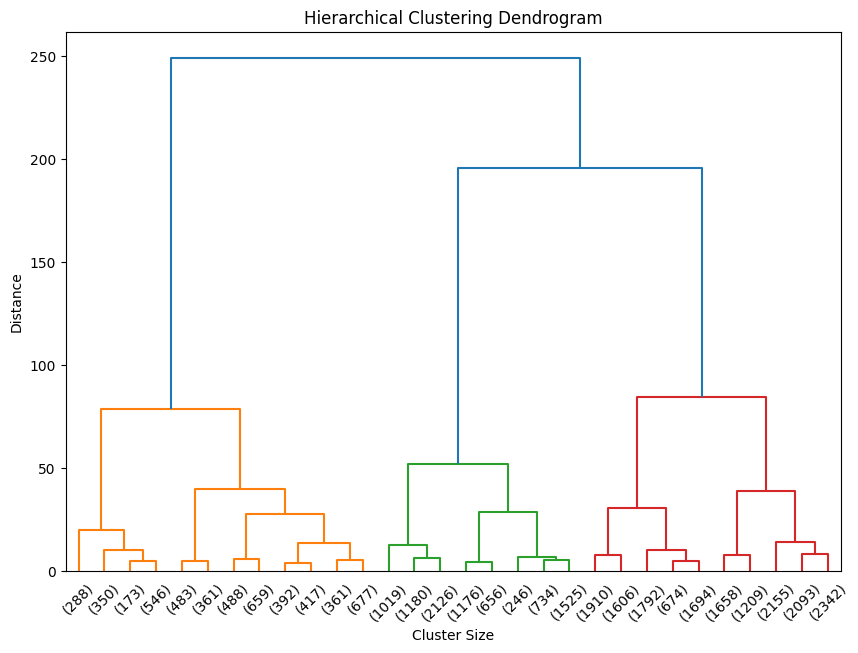

cluster
1    0.0
2    1.0
Name: is_delay, dtype: float64

In [783]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Preprocessing
tempDF = df[['Temperature (°F)_Avg', 'is_delay']].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(tempDF)

# Perform Hierarchical Clustering
linkage_matrix = linkage(scaled_data, method='ward')

# Plot the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

# Assign clusters
tempDF['cluster'] = fcluster(linkage_matrix, t=2, criterion='maxclust')
tempDF.groupby('cluster')['is_delay'].mean()


In [784]:
# Assigning labels to the clusters based on the previously computed cluster values
tempDF['Temperature_Condition'] = tempDF['cluster'].map({
    1: 'Low Temperature',
    2: 'High Temperature',  # Optional if you have 3 clusters
})

# Check the value counts for the new feature
print(tempDF['Temperature_Condition'].value_counts())

# Encode 'Temperature_Condition' into a numerical format for correlation analysis
tempDF['Temperature_Condition_encoded'] = tempDF['Temperature_Condition'].map({
    'Low Temperature': 0,
    'High Temperature': 1,
})

# Now, check the correlation between the new feature and 'is_delay'
correlation = tempDF[['Temperature_Condition_encoded', 'is_delay']].corr()
correlation


Temperature_Condition
High Temperature    25795
Low Temperature      5195
Name: count, dtype: int64


,Temperature_Condition_encoded,is_delay
Temperature_Condition_encoded,1.0,1.0
is_delay,1.0,1.0


In [785]:
tempDF['cluster'] = fcluster(linkage_matrix, t=2, criterion='maxclust')
tempDF.groupby('cluster')['is_delay'].mean()


cluster
1    0.0
2    1.0
Name: is_delay, dtype: float64

In [786]:

tempDF.groupby('cluster')['Temperature (°F)_Avg'].mean()


cluster
1    78.135419
2    76.300640
Name: Temperature (°F)_Avg, dtype: float64

In [787]:

tempDF.groupby('cluster')['Temperature (°F)_Avg'].std()


cluster
1    14.145289
2    14.945234
Name: Temperature (°F)_Avg, dtype: float64

In [788]:
print(tempDF.groupby('cluster')['Temperature (°F)_Avg'].max())

tempDF.groupby('cluster')['Temperature (°F)_Avg'].min()


cluster
1    100.8
2    100.8
Name: Temperature (°F)_Avg, dtype: float64


cluster
1    45.5
2    45.5
Name: Temperature (°F)_Avg, dtype: float64

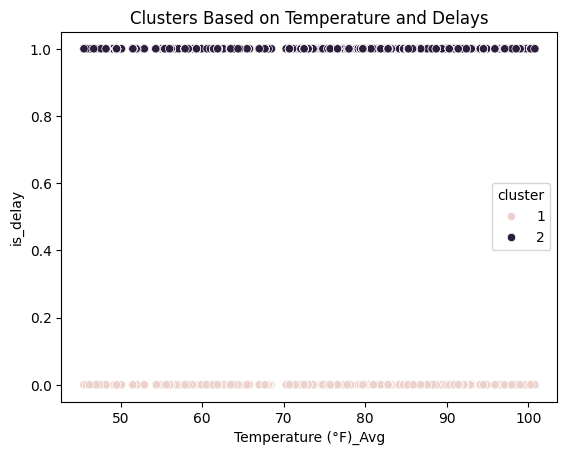

In [789]:
sns.scatterplot(data=tempDF, x='Temperature (°F)_Avg', y='is_delay', hue='cluster')
plt.title('Clusters Based on Temperature and Delays')
plt.show()


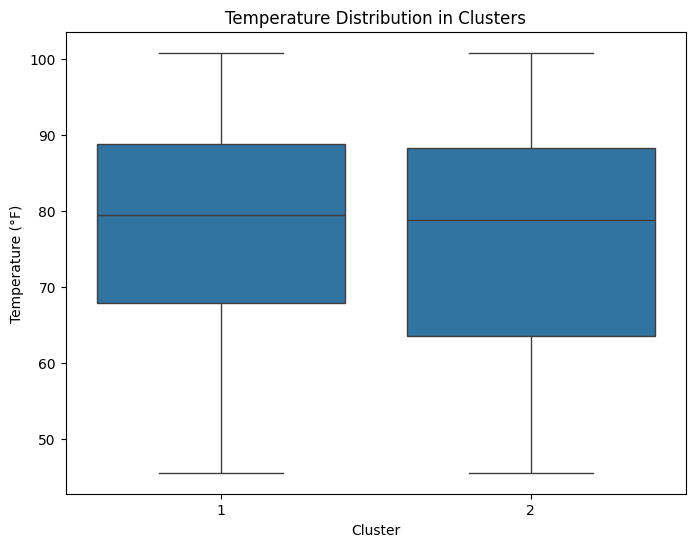

In [790]:
import seaborn as sns

# Boxplot to show the temperature distribution across clusters
plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster', y='Temperature (°F)_Avg', data=tempDF)
plt.title('Temperature Distribution in Clusters')
plt.xlabel('Cluster')
plt.ylabel('Temperature (°F)')
plt.show()


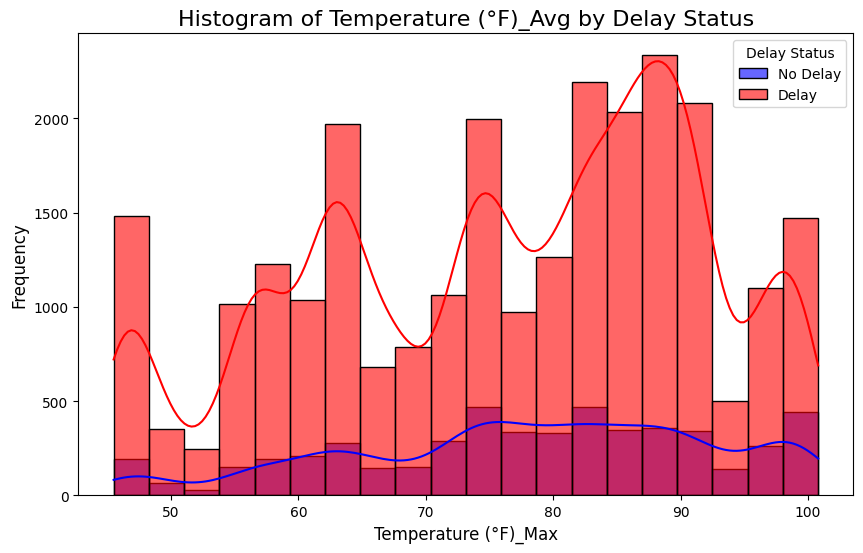

In [791]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis object
plt.figure(figsize=(10, 6))

# Plotting histograms for Temperature (°F)_Max, separated by delay status (is_delay)
sns.histplot(data=tempDF[tempDF['is_delay'] == 0], x='Temperature (°F)_Avg', color='blue', label='No Delay', kde=True, bins=20, alpha=0.6)
sns.histplot(data=tempDF[tempDF['is_delay'] == 1], x='Temperature (°F)_Avg', color='red', label='Delay', kde=True, bins=20, alpha=0.6)

# Adding titles and labels
plt.title('Histogram of Temperature (°F)_Avg by Delay Status', fontsize=16)
plt.xlabel('Temperature (°F)_Max', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display legend
plt.legend(title='Delay Status')

# Show the plot
plt.show()


In [792]:
# Step 1: Define the temperature ranges (bins) for grouping
bins = [tempDF['Temperature (°F)_Avg'].min(), 60, 70, 80, 90, 100, 110, 120]  # You can adjust these bins if needed
labels = ['< 60', '60-70', '70-80', '80-90', '90-100', '100-110', '110-120']

# Step 2: Create a new column for temperature ranges
tempDF['Temperature_Range'] = pd.cut(tempDF['Temperature (°F)_Avg'], bins=bins, labels=labels, right=False)

# Step 3: Calculate the percentage of delays for each temperature range
delay_percentage = tempDF.groupby('Temperature_Range')['is_delay'].mean() * 100

# Step 4: Sort the percentages in ascending order
delay_percentage_sorted = delay_percentage.sort_values(ascending=True)

# Step 5: Print the sorted delay percentages
print(delay_percentage_sorted)


Temperature_Range
100-110    75.917431
70-80      79.192897
90-100     81.724493
80-90      83.799014
60-70      85.745440
< 60       87.175879
110-120          NaN
Name: is_delay, dtype: float64


C:\Users\Muhammad Umer\AppData\Local\Temp\ipykernel_13396\3218343628.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_percentage = tempDF.groupby('Temperature_Range')['is_delay'].mean() * 100


In [793]:
df = df.dropna(subset='is_delay')

In [794]:
from scipy.cluster.hierarchy import fcluster, linkage
import numpy as np
from scipy.spatial.distance import cdist

# Step 1: Perform Hierarchical Clustering on the training data
linkage_matrix = linkage(df[['Temperature (°F)_Avg']], method='ward')

# Step 2: Assign clusters to the training data (tempDF)
df['cluster'] = fcluster(linkage_matrix, t=2, criterion='maxclust')
df['Temperature_cate'] = df['cluster'].map({1: 'Low', 2: 'High'})

distances = cdist(test[['Temperature (°F)_Avg']], df[['Temperature (°F)_Avg']], metric='euclidean')

# Step 4: Assign the closest cluster to each test data point
# Find the index of the closest training point for each test data point
closest_training_indices = np.argmin(distances, axis=1)

# Step 5: Use the clusters from the closest training points to assign clusters to the test data
test['cluster'] = df['cluster'].iloc[closest_training_indices].values

test['Temperature_Condition'] = test['cluster'].map({1: 'Low', 2: 'High'})
test[['Temperature (°F)_Avg', 'cluster', 'Temperature_Condition']].head()


,Temperature (°F)_Avg,cluster,Temperature_Condition
0,90.4,2,High
1,93.0,2,High
2,91.6,2,High
3,84.7,2,High
4,96.6,2,High


# Humidity categories

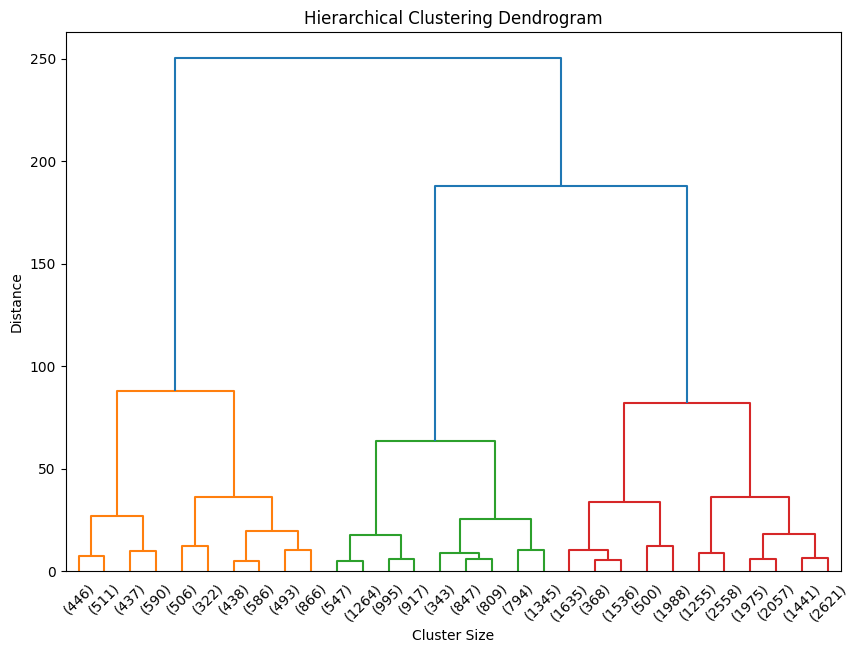

cluster
1    0.0
2    1.0
Name: is_delay, dtype: float64

In [795]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Preprocessing
tempDF = df[['Humidity (%)_Avg', 'is_delay']].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(tempDF)

# Perform Hierarchical Clustering
linkage_matrix = linkage(scaled_data, method='ward')

# Plot the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

# Assign clusters
tempDF['cluster'] = fcluster(linkage_matrix, t=2, criterion='maxclust')
tempDF.groupby('cluster')['is_delay'].mean()


In [796]:
tempDF['cluster'] = fcluster(linkage_matrix, t=2, criterion='maxclust')
print(tempDF.groupby('cluster')['is_delay'].mean())

print(tempDF.groupby('cluster')['Humidity (%)_Avg'].mean())

print(tempDF.groupby('cluster')['Humidity (%)_Avg'].std())

print(tempDF.groupby('cluster')['Humidity (%)_Avg'].max())

tempDF.groupby('cluster')['Humidity (%)_Avg'].min()



cluster
1    0.0
2    1.0
Name: is_delay, dtype: float64
cluster
1    56.772782
2    61.675340
Name: Humidity (%)_Avg, dtype: float64
cluster
1    16.753502
2    16.338068
Name: Humidity (%)_Avg, dtype: float64
cluster
1    95.7
2    95.7
Name: Humidity (%)_Avg, dtype: float64


cluster
1    21.9
2    21.9
Name: Humidity (%)_Avg, dtype: float64

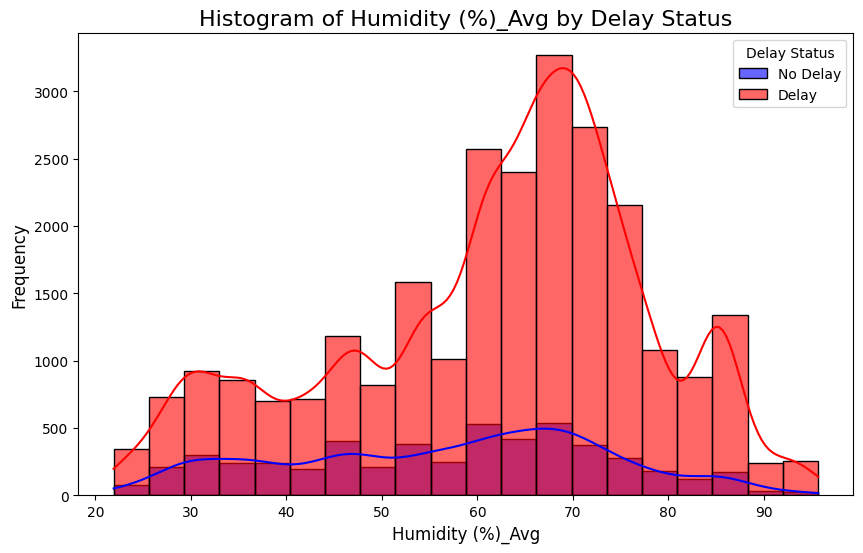

In [797]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis object
plt.figure(figsize=(10, 6))

# Plotting histograms for Temperature (°F)_Max, separated by delay status (is_delay)
sns.histplot(data=tempDF[tempDF['is_delay'] == 0], x='Humidity (%)_Avg', color='blue', label='No Delay', kde=True, bins=20, alpha=0.6)
sns.histplot(data=tempDF[tempDF['is_delay'] == 1], x='Humidity (%)_Avg', color='red', label='Delay', kde=True, bins=20, alpha=0.6)

# Adding titles and labels
plt.title('Histogram of Humidity (%)_Avg by Delay Status', fontsize=16)
plt.xlabel('Humidity (%)_Avg', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display legend
plt.legend(title='Delay Status')

# Show the plot
plt.show()



In [798]:
from scipy.cluster.hierarchy import fcluster, linkage
import numpy as np
from scipy.spatial.distance import cdist

linkage_matrix = linkage(df[['Humidity (%)_Avg', 'is_delay']], method='ward')

df['cluster'] = fcluster(linkage_matrix, t=2, criterion='maxclust')
df['Humidity_cate'] = df['cluster'].map({1: 'Low', 2: 'High'})

distances = cdist(test[['Humidity (%)_Avg']], tempDF[['Humidity (%)_Avg']], metric='euclidean')

closest_training_indices = np.argmin(distances, axis=1)

test['cluster'] = df['cluster'].iloc[closest_training_indices].values

test['Humidity_cate'] = test['cluster'].map({1: 'Low', 2: 'High'})
test[['Humidity (%)_Avg', 'cluster', 'Humidity_cate']].head()


,Humidity (%)_Avg,cluster,Humidity_cate
0,33.2,1,Low
1,31.1,1,Low
2,42.5,1,Low
3,54.2,1,Low
4,33.3,1,Low


In [799]:

correlation = df['cluster'].corr(df['is_delay'])
print(f"Correlation between 'cluster' and 'is_delay': {correlation}")


Correlation between 'cluster' and 'is_delay': 0.10558239135129872


# mixing Humidity N Temperature

In [800]:
from sklearn.preprocessing import StandardScaler

# Select relevant columns
features = ['Humidity (%)_Avg', 'Temperature (°F)_Avg',  ]

# tempDF = df.copy()

# Preprocessing: Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

from scipy.cluster.hierarchy import linkage, fcluster

# Perform Hierarchical Clustering
linkage_matrix = linkage(scaled_data, method='ward')

# Assign clusters (e.g., 2 clusters)
df['hierarchical_cluster'] = fcluster(linkage_matrix, t=2, criterion='maxclust')
df['Humid_Temp'] = df['hierarchical_cluster'].map({1: 'Low', 2: 'High'})

hierarchical_corr = df['hierarchical_cluster'].corr(df['is_delay'])
print(f"Correlation between Hierarchical cluster and 'is_delay': {hierarchical_corr}")



distances = cdist(test[['Humidity (%)_Avg']], df[['Humidity (%)_Avg']], metric='euclidean')
closest_training_indices = np.argmin(distances, axis=1)

test['cluster'] = df['hierarchical_cluster'].iloc[closest_training_indices].values
test['Humid_Temp'] = test['cluster'].map({1: 'Low', 2: 'High'})


Correlation between Hierarchical cluster and 'is_delay': 0.1114708955660892


In [801]:

print(df.groupby('cluster')['is_delay'].mean())

print(df.groupby('cluster')[ features].mean())

print(df.groupby('cluster')[features].std())

print(df.groupby('cluster')[features].max())

df.groupby('cluster')[features].min()



cluster
1    0.775782
2    0.859855
Name: is_delay, dtype: float64
         Humidity (%)_Avg  Temperature (°F)_Avg
cluster                                        
1               40.982226             85.611833
2               70.507604             72.233965
         Humidity (%)_Avg  Temperature (°F)_Avg
cluster                                        
1                9.473404             12.022740
2                8.738621             14.072312
         Humidity (%)_Avg  Temperature (°F)_Avg
cluster                                        
1                    55.1                 100.8
2                    95.7                  93.2


,Humidity (%)_Avg,Temperature (°F)_Avg
cluster,,
1,21.9,57.9
2,56.0,45.5


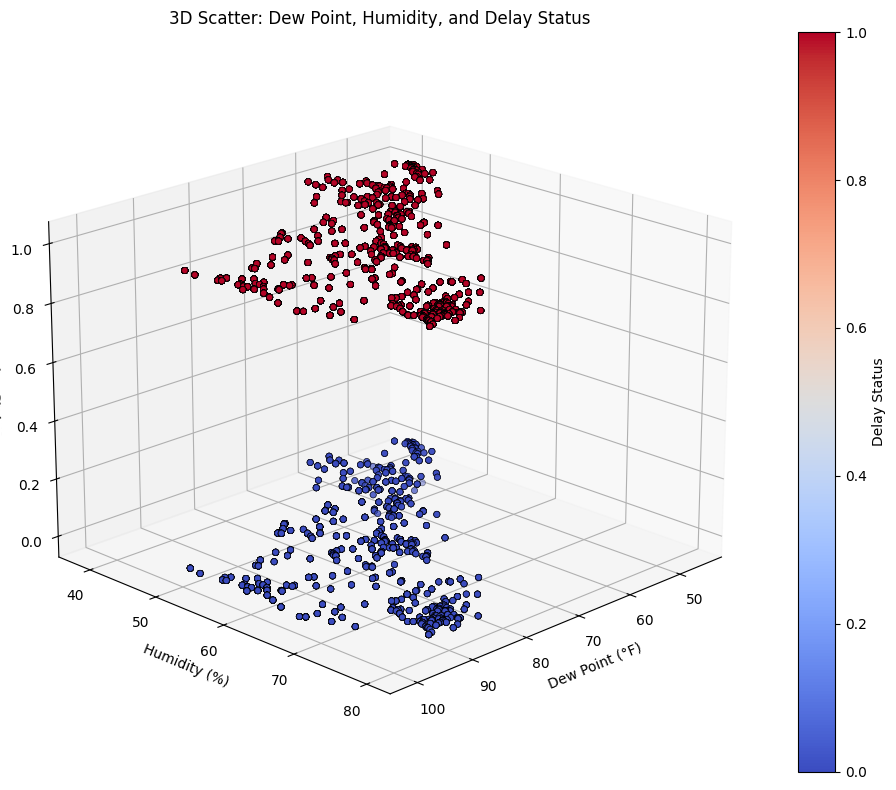

In [802]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def create_3d_scatter(x, y, z):
    # Create the 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create scatter plot with color coding based on delay
    scatter = ax.scatter(x, y, z, 
                         c=z, 
                         cmap='coolwarm', 
                         marker='o', 
                         edgecolors='black', 
                         linewidth=0.5)
    
    # Set labels
    ax.set_xlabel('Dew Point (°F)', fontsize=10)
    ax.set_ylabel('Humidity (%)', fontsize=10)
    ax.set_zlabel('Delay Status', fontsize=10)
    
    # Add a color bar
    plt.colorbar(scatter, ax=ax, label='Delay Status')
    
    # Set title
    plt.title('3D Scatter: Dew Point, Humidity, and Delay Status', fontsize=12)
    
    # Adjust the view angle for better visibility
    ax.view_init(20, 45)
    
    plt.tight_layout()
    plt.show()


x = df['Temperature (°F)_Avg']
y = df['Dew Point (°F)_Avg']
z = df['is_delay']

# Assuming x, y, z are pandas Series or numpy arrays
create_3d_scatter(x, y, z)

# If flights are shared

In [803]:

df['shared'] = np.where(df['codeshared_airline_name'].notna(), 1, 0)
test['shared'] = np.where(test['codeshared_airline_name'].notna(), 1, 0)


# Feature Selection

In [804]:
df.columns

Index(['type', 'departure_iataCode', 'departure_terminal',
       'departure_scheduledTime', 'departure_estimatedTime',
       'departure_actualTime', 'arrival_iataCode', 'arrival_terminal',
       'arrival_scheduledTime', 'arrival_estimatedTime', 'airline_name',
       'airline_icaoCode', 'flight_number', 'flight_icaoNumber',
       'codeshared_airline_name', 'codeshared_airline_icaoCode',
       'codeshared_flight_number', 'codeshared_flight_icaoNumber',
       'arrival_actualTime', 'departure_scheduledDate', 'departure_actualDate',
       'departure_estimatedRunwayDate', 'departure_estimatedRunwayTime',
       'departure_actualRunwayDate', 'departure_actualRunwayTime',
       'arrival_scheduledDate', 'arrival_estimatedDate',
       'arrival_estimatedRunwayDate', 'arrival_estimatedRunwayTime',
       'arrival_actualRunwayDate', 'arrival_actualRunwayTime',
       'Temperature (°F)_Avg', 'Dew Point (°F)_Avg', 'Dew Point (°F)_Min',
       'Humidity (%)_Avg', 'Humidity (%)_Min', 'Wind Sp

In [805]:

df = df.drop(columns = [ 'type','cluster', 'hierarchical_cluster', 'departure_hour', 'departure_terminal', ])
test = test.drop(columns = ['cluster', 'type',])


In [806]:

output_file = "featuredtrain.csv"
df.to_csv(output_file, index=False)

print(f"Data successfully saved to {output_file}")


Data successfully saved to featuredtrain.csv


In [807]:

output_file = "featuredtest.csv"
test.to_csv(output_file, index=False)

print(f"Data successfully saved to {output_file}")


Data successfully saved to featuredtest.csv
